In [ ]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       ! pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 26.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import json
import glob
import os
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_val_df = pd.read_csv('/content/drive/MyDrive/Thesis/Final/pretrained_train_val_with_structured_final.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Thesis/Final/pretrained_test_with_structured_final.csv')

In [ ]:
train_val_df.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,state_binary,project_number,country_displayable_name,photo,prelaunch_activated,staff_pick,parent_category,duration,preparation_days,quarter,creator_backing_count,has_video,goal_usd,gender,blurb_word_count,name_word_count
0,0.001549,0.191861,0.070232,-0.027889,0.327811,-0.014573,-0.002273,-0.032581,0.107002,0.05773,-0.035166,0.079102,-0.005442,-0.062071,0.105632,0.099387,-0.154076,0.038753,0.043547,0.024334,-0.044137,0.075117,0.116417,0.013008,-0.196921,0.064375,-0.008741,0.070227,0.013742,-0.079173,-0.124796,-0.051765,0.088412,0.066934,0.017416,0.049757,0.049486,0.067848,0.296692,-0.051275,0.183902,-0.263937,-0.052346,0.02462,-0.02508,0.044743,-0.120653,-0.017794,0.135856,-0.039999,0.070808,0.018751,-0.004307,-0.059973,-0.035144,0.136536,-0.044794,-0.015409,0.047479,0.040011,0.087983,0.394387,0.004448,0.046858,0.047068,-0.002112,-0.013852,0.100645,-0.063298,0.009302,0.012022,-0.059053,0.06587,-0.201134,0.029437,0.01942,0.083741,-6.350835,-0.020651,0.044665,0.082014,0.004817,0.827275,-0.036503,-0.078059,-0.091649,-0.042236

In [ ]:
test_df.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,state_binary,project_number,country_displayable_name,photo,prelaunch_activated,staff_pick,parent_category,duration,preparation_days,quarter,creator_backing_count,has_video,goal_usd,gender,blurb_word_count,name_word_count
0,0.026167,0.043765,0.035662,-0.046763,0.100084,0.204272,0.043264,0.034776,0.132147,0.076886,-0.000026,0.244731,-0.042049,-0.15246,-0.001888,-0.1162,-0.182791,-0.05633,-0.075599,-0.025764,0.048453,-0.050121,-0.037337,-0.019634,-0.152174,0.04001,-0.100933,0.106329,0.275709,-0.084783,-0.156809,-0.099864,0.031674,0.063722,-0.09359,-0.001718,0.139442,0.046005,0.362427,0.076819,-0.041539,-0.055236,-0.144998,-0.150843,0.089847,0.040793,-0.004132,-0.040338,0.01478,-0.064968,0.02869,0.071257,0.035274,0.013179,0.043921,0.179903,-0.020797,-0.046404,0.055165,-0.040316,-0.126581,0.03538,-0.008009,0.049611,-0.075123,-0.063941,-0.024017,0.079174,-0.025793,-0.09406,0.045872,0.012982,-0.068103,-0.062789,0.018727,-0.007344,0.034698,-7.145373,-0.236648,-0.014188,0.08645,-0.08778,0.950002,-0.077297,0.073557,0.073066,0.02216

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt
import optuna
import copy
import random
import os
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import json
import pickle
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, roc_curve, f1_score, confusion_matrix, roc_auc_score
pd.set_option('display.max_columns', None)

[INFO] Device: cuda
[INFO] Final Train/Val Shape: torch.Size([146089, 824])
[INFO] Final Test Shape: torch.Size([16233, 824])

 STARTING NESTED CROSS-VALIDATION

[FOLD 1/5] Starting outer fold...


[I 2025-05-10 18:51:42,782] A new study created in memory with name: no-name-4976c645-19c2-41a4-bb69-00169267a989


[FOLD 1/5] Starting hyperparameter search with Optuna...
Starting Trial #1/50


[I 2025-05-10 18:54:04,488] Trial 0 finished with value: 0.8646639186605433 and parameters: {'n_layers': 2, 'hidden_size': 256, 'activation': 'LeakyReLU', 'dropout': 0.16693857257260214, 'optimizer': 'AdamW', 'lr': 0.00011141290083832074, 'weight_decay': 2.675275987090259e-06, 'batch_size': 256}. Best is trial 0 with value: 0.8646639186605433.


Starting Trial #2/50


[I 2025-05-10 18:55:18,902] Trial 1 finished with value: 0.8656018916253373 and parameters: {'n_layers': 2, 'hidden_size': 256, 'activation': 'ReLU', 'dropout': 0.2841068777290483, 'optimizer': 'AdamW', 'lr': 0.0006228588782797086, 'weight_decay': 1.1900451874397937e-05, 'batch_size': 256}. Best is trial 1 with value: 0.8656018916253373.


Starting Trial #3/50


[I 2025-05-10 18:56:26,815] Trial 2 finished with value: 0.865369637732251 and parameters: {'n_layers': 2, 'hidden_size': 384, 'activation': 'LeakyReLU', 'dropout': 0.2040798757336057, 'optimizer': 'Adam', 'lr': 0.00033888686101368016, 'weight_decay': 5.418244304265203e-06, 'batch_size': 512}. Best is trial 1 with value: 0.8656018916253373.


Starting Trial #4/50


[I 2025-05-10 19:01:42,042] Trial 3 finished with value: 0.8649870710133012 and parameters: {'n_layers': 4, 'hidden_size': 256, 'activation': 'ReLU', 'dropout': 0.326385798622732, 'optimizer': 'Adam', 'lr': 4.4038456483705654e-05, 'weight_decay': 0.0003328258238771625, 'batch_size': 128}. Best is trial 1 with value: 0.8656018916253373.


Starting Trial #5/50


[I 2025-05-10 19:02:53,355] Trial 4 finished with value: 0.8644361220434201 and parameters: {'n_layers': 3, 'hidden_size': 512, 'activation': 'LeakyReLU', 'dropout': 0.1535109603297697, 'optimizer': 'Adam', 'lr': 0.00021037544078820935, 'weight_decay': 5.005300429186165e-05, 'batch_size': 512}. Best is trial 1 with value: 0.8656018916253373.


Starting Trial #6/50


[I 2025-05-10 19:05:24,637] Trial 5 finished with value: 0.8650197999788589 and parameters: {'n_layers': 5, 'hidden_size': 512, 'activation': 'ReLU', 'dropout': 0.1936183381191688, 'optimizer': 'Adam', 'lr': 0.000552902921611751, 'weight_decay': 0.00022354386498266507, 'batch_size': 128}. Best is trial 1 with value: 0.8656018916253373.


Starting Trial #7/50


[I 2025-05-10 19:05:40,650] Trial 6 pruned. 


Starting Trial #8/50


[I 2025-05-10 19:05:49,752] Trial 7 pruned. 


Starting Trial #9/50


[I 2025-05-10 19:05:58,772] Trial 8 pruned. 


Starting Trial #10/50


[I 2025-05-10 19:06:05,516] Trial 9 pruned. 


Starting Trial #11/50


[I 2025-05-10 19:07:28,123] Trial 10 finished with value: 0.8655011919993424 and parameters: {'n_layers': 4, 'hidden_size': 256, 'activation': 'ReLU', 'dropout': 0.28261203891950076, 'optimizer': 'AdamW', 'lr': 0.0008921535286618015, 'weight_decay': 5.6266468683837284e-05, 'batch_size': 256}. Best is trial 1 with value: 0.8656018916253373.


Starting Trial #12/50


[I 2025-05-10 19:08:49,502] Trial 11 finished with value: 0.8648764998555319 and parameters: {'n_layers': 4, 'hidden_size': 256, 'activation': 'ReLU', 'dropout': 0.2809580556758614, 'optimizer': 'AdamW', 'lr': 0.000975843294058941, 'weight_decay': 5.8159307043980156e-05, 'batch_size': 256}. Best is trial 1 with value: 0.8656018916253373.


Starting Trial #13/50


[I 2025-05-10 19:09:00,492] Trial 12 pruned. 


Starting Trial #14/50


[I 2025-05-10 19:10:30,529] Trial 13 finished with value: 0.8637192563098585 and parameters: {'n_layers': 4, 'hidden_size': 256, 'activation': 'ReLU', 'dropout': 0.2357343254516932, 'optimizer': 'AdamW', 'lr': 0.0003534421217080103, 'weight_decay': 0.00011910759803021107, 'batch_size': 256}. Best is trial 1 with value: 0.8656018916253373.


Starting Trial #15/50


[I 2025-05-10 19:10:40,258] Trial 14 pruned. 


Starting Trial #16/50


[I 2025-05-10 19:12:23,945] Trial 15 finished with value: 0.8657859006971736 and parameters: {'n_layers': 4, 'hidden_size': 256, 'activation': 'ReLU', 'dropout': 0.30911178738308964, 'optimizer': 'AdamW', 'lr': 0.0005798405605565235, 'weight_decay': 8.541180796014583e-06, 'batch_size': 256}. Best is trial 15 with value: 0.8657859006971736.


Starting Trial #17/50


[I 2025-05-10 19:13:54,123] Trial 16 finished with value: 0.8669352028323744 and parameters: {'n_layers': 3, 'hidden_size': 256, 'activation': 'ReLU', 'dropout': 0.33284292958028666, 'optimizer': 'AdamW', 'lr': 0.0004225118160826592, 'weight_decay': 1.1072226391082086e-05, 'batch_size': 256}. Best is trial 16 with value: 0.8669352028323744.


Starting Trial #18/50


[I 2025-05-10 19:14:03,906] Trial 17 pruned. 


Starting Trial #19/50


[I 2025-05-10 19:16:33,346] Trial 18 finished with value: 0.8639669466436438 and parameters: {'n_layers': 5, 'hidden_size': 256, 'activation': 'ReLU', 'dropout': 0.3434835269842162, 'optimizer': 'AdamW', 'lr': 0.0005024178756554064, 'weight_decay': 2.3728815498877575e-06, 'batch_size': 128}. Best is trial 16 with value: 0.8669352028323744.


Starting Trial #20/50


[I 2025-05-10 19:16:40,926] Trial 19 pruned. 


Starting Trial #21/50


[I 2025-05-10 19:16:50,644] Trial 20 pruned. 


Starting Trial #22/50


[I 2025-05-10 19:18:14,871] Trial 21 finished with value: 0.8647788089960171 and parameters: {'n_layers': 3, 'hidden_size': 256, 'activation': 'ReLU', 'dropout': 0.2837589038561471, 'optimizer': 'AdamW', 'lr': 0.0005212165896037747, 'weight_decay': 1.1796938594204457e-05, 'batch_size': 256}. Best is trial 16 with value: 0.8669352028323744.


Starting Trial #23/50


[I 2025-05-10 19:19:48,572] Trial 22 finished with value: 0.8646803317865442 and parameters: {'n_layers': 4, 'hidden_size': 256, 'activation': 'ReLU', 'dropout': 0.36192292481543553, 'optimizer': 'AdamW', 'lr': 0.0006319156372612029, 'weight_decay': 1.0565344830263315e-05, 'batch_size': 256}. Best is trial 16 with value: 0.8669352028323744.


Starting Trial #24/50


[I 2025-05-10 19:21:26,028] Trial 23 finished with value: 0.8650001827698791 and parameters: {'n_layers': 2, 'hidden_size': 256, 'activation': 'ReLU', 'dropout': 0.3037692055816894, 'optimizer': 'AdamW', 'lr': 0.00036526147785148654, 'weight_decay': 2.9341983039672582e-05, 'batch_size': 256}. Best is trial 16 with value: 0.8669352028323744.


Starting Trial #25/50


[I 2025-05-10 19:22:43,666] Trial 24 finished with value: 0.8655890275864736 and parameters: {'n_layers': 3, 'hidden_size': 256, 'activation': 'ReLU', 'dropout': 0.2713440836940923, 'optimizer': 'AdamW', 'lr': 0.0006680214080050616, 'weight_decay': 5.3990584112068214e-06, 'batch_size': 256}. Best is trial 16 with value: 0.8669352028323744.


Starting Trial #26/50


[I 2025-05-10 19:22:54,322] Trial 25 pruned. 


Starting Trial #27/50


[I 2025-05-10 19:23:04,360] Trial 26 pruned. 


Starting Trial #28/50


[I 2025-05-10 19:24:40,010] Trial 27 finished with value: 0.8659319473811258 and parameters: {'n_layers': 2, 'hidden_size': 256, 'activation': 'ReLU', 'dropout': 0.34292242913964177, 'optimizer': 'AdamW', 'lr': 0.0004458401226902139, 'weight_decay': 4.04796916326439e-06, 'batch_size': 256}. Best is trial 16 with value: 0.8669352028323744.


Starting Trial #29/50


[I 2025-05-10 19:24:48,100] Trial 28 pruned. 


Starting Trial #30/50


[I 2025-05-10 19:25:03,138] Trial 29 pruned. 



[FOLD 1/5] Best hyperparameters:
  - n_layers: 3
  - hidden_size: 256
  - activation: ReLU
  - dropout: 0.33284292958028666
  - optimizer: AdamW
  - lr: 0.0004225118160826592
  - weight_decay: 1.1072226391082086e-05
  - batch_size: 256

[FOLD 1/5] Training model with best hyperparameters...

[FOLD 1/5] Results: F1=0.8696, AUC=0.9080

[FOLD 2/5] Starting outer fold...


[I 2025-05-10 19:25:41,929] A new study created in memory with name: no-name-3b21715b-abc4-4d3d-b0b2-547b964ea903


[FOLD 2/5] Starting hyperparameter search with Optuna...
Starting Trial #1/50


[I 2025-05-10 19:30:15,848] Trial 0 finished with value: 0.8661922967279053 and parameters: {'n_layers': 3, 'hidden_size': 512, 'activation': 'LeakyReLU', 'dropout': 0.22702680372683615, 'optimizer': 'Adam', 'lr': 3.2561445395722307e-05, 'weight_decay': 3.55057138001931e-05, 'batch_size': 128}. Best is trial 0 with value: 0.8661922967279053.


Starting Trial #2/50


[I 2025-05-10 19:33:29,770] Trial 1 finished with value: 0.8664953994944663 and parameters: {'n_layers': 5, 'hidden_size': 256, 'activation': 'ReLU', 'dropout': 0.3496268593607811, 'optimizer': 'Adam', 'lr': 0.0007292165346157023, 'weight_decay': 0.00012016210462225986, 'batch_size': 128}. Best is trial 1 with value: 0.8664953994944663.


Starting Trial #3/50


[I 2025-05-10 19:36:07,406] Trial 2 finished with value: 0.8673274135633634 and parameters: {'n_layers': 2, 'hidden_size': 256, 'activation': 'ReLU', 'dropout': 0.27557338062587144, 'optimizer': 'Adam', 'lr': 0.0002621626029001327, 'weight_decay': 0.0006071959181372095, 'batch_size': 256}. Best is trial 2 with value: 0.8673274135633634.


Starting Trial #4/50


[I 2025-05-10 19:39:46,850] Trial 3 finished with value: 0.8667384286274 and parameters: {'n_layers': 2, 'hidden_size': 512, 'activation': 'LeakyReLU', 'dropout': 0.34532089951099343, 'optimizer': 'Adam', 'lr': 5.561064322071543e-05, 'weight_decay': 0.00011450557230231501, 'batch_size': 512}. Best is trial 2 with value: 0.8673274135633634.


Starting Trial #5/50


[I 2025-05-10 19:43:56,042] Trial 4 finished with value: 0.8666477056877931 and parameters: {'n_layers': 5, 'hidden_size': 384, 'activation': 'ReLU', 'dropout': 0.11705533417546812, 'optimizer': 'Adam', 'lr': 2.691507522322348e-05, 'weight_decay': 4.0539107332581106e-06, 'batch_size': 256}. Best is trial 2 with value: 0.8673274135633634.


Starting Trial #6/50


[I 2025-05-10 19:44:18,228] Trial 5 pruned. 


Starting Trial #7/50


[I 2025-05-10 19:46:57,931] Trial 6 finished with value: 0.865258793237765 and parameters: {'n_layers': 5, 'hidden_size': 512, 'activation': 'LeakyReLU', 'dropout': 0.26658003591958374, 'optimizer': 'Adam', 'lr': 0.0009456115339110885, 'weight_decay': 8.3823987603743e-06, 'batch_size': 128}. Best is trial 2 with value: 0.8673274135633634.


Starting Trial #8/50


[I 2025-05-10 19:47:06,795] Trial 7 pruned. 


Starting Trial #9/50


[I 2025-05-10 19:47:18,514] Trial 8 pruned. 


Starting Trial #10/50


[I 2025-05-10 19:47:28,991] Trial 9 pruned. 


Starting Trial #11/50


[I 2025-05-10 19:49:46,619] Trial 10 finished with value: 0.8661033587453612 and parameters: {'n_layers': 3, 'hidden_size': 256, 'activation': 'ReLU', 'dropout': 0.20881455657534959, 'optimizer': 'Adam', 'lr': 0.00026400117788054404, 'weight_decay': 0.0008554527248324334, 'batch_size': 256}. Best is trial 2 with value: 0.8673274135633634.


Starting Trial #12/50


[I 2025-05-10 19:49:54,888] Trial 11 pruned. 


Starting Trial #13/50


[I 2025-05-10 19:50:04,367] Trial 12 pruned. 


Starting Trial #14/50


[I 2025-05-10 19:52:15,561] Trial 13 finished with value: 0.865880824436971 and parameters: {'n_layers': 3, 'hidden_size': 256, 'activation': 'ReLU', 'dropout': 0.33320861897732035, 'optimizer': 'Adam', 'lr': 0.00012619474461909635, 'weight_decay': 3.782564280283436e-05, 'batch_size': 256}. Best is trial 2 with value: 0.8673274135633634.


Starting Trial #15/50


[I 2025-05-10 19:52:24,537] Trial 14 pruned. 


Starting Trial #16/50


[I 2025-05-10 19:54:07,604] Trial 15 finished with value: 0.8687024482234725 and parameters: {'n_layers': 2, 'hidden_size': 512, 'activation': 'LeakyReLU', 'dropout': 0.3892231727451837, 'optimizer': 'Adam', 'lr': 0.00045822065812674794, 'weight_decay': 1.1428442432889102e-06, 'batch_size': 256}. Best is trial 15 with value: 0.8687024482234725.


Starting Trial #17/50


[I 2025-05-10 19:56:03,195] Trial 16 finished with value: 0.8677416055989554 and parameters: {'n_layers': 4, 'hidden_size': 256, 'activation': 'LeakyReLU', 'dropout': 0.39165210851057264, 'optimizer': 'Adam', 'lr': 0.00048767666851975164, 'weight_decay': 1.09832622102391e-06, 'batch_size': 256}. Best is trial 15 with value: 0.8687024482234725.


Starting Trial #18/50


[I 2025-05-10 19:57:49,213] Trial 17 finished with value: 0.865064951762594 and parameters: {'n_layers': 4, 'hidden_size': 512, 'activation': 'LeakyReLU', 'dropout': 0.3982193205214036, 'optimizer': 'Adam', 'lr': 0.0005059075275253007, 'weight_decay': 1.006897721494234e-06, 'batch_size': 256}. Best is trial 15 with value: 0.8687024482234725.


Starting Trial #19/50


[I 2025-05-10 19:59:45,973] Trial 18 finished with value: 0.8672593565982011 and parameters: {'n_layers': 4, 'hidden_size': 256, 'activation': 'LeakyReLU', 'dropout': 0.3775520267624561, 'optimizer': 'AdamW', 'lr': 0.0004753170087648135, 'weight_decay': 1.167875892147177e-06, 'batch_size': 256}. Best is trial 15 with value: 0.8687024482234725.


Starting Trial #20/50


[I 2025-05-10 20:01:20,750] Trial 19 finished with value: 0.8678217367114178 and parameters: {'n_layers': 3, 'hidden_size': 384, 'activation': 'LeakyReLU', 'dropout': 0.31198096344670867, 'optimizer': 'Adam', 'lr': 0.0005955835229787125, 'weight_decay': 2.3152840853637103e-06, 'batch_size': 256}. Best is trial 15 with value: 0.8687024482234725.


Starting Trial #21/50


[I 2025-05-10 20:03:24,842] Trial 20 finished with value: 0.8673167902119282 and parameters: {'n_layers': 3, 'hidden_size': 384, 'activation': 'LeakyReLU', 'dropout': 0.30959115215898336, 'optimizer': 'Adam', 'lr': 0.00014657881758035353, 'weight_decay': 2.6799747482213137e-06, 'batch_size': 256}. Best is trial 15 with value: 0.8687024482234725.


Starting Trial #22/50


[I 2025-05-10 20:05:18,609] Trial 21 finished with value: 0.8676087029149446 and parameters: {'n_layers': 4, 'hidden_size': 384, 'activation': 'LeakyReLU', 'dropout': 0.365677544069656, 'optimizer': 'Adam', 'lr': 0.00044745602871727313, 'weight_decay': 2.1607080228610526e-06, 'batch_size': 256}. Best is trial 15 with value: 0.8687024482234725.


Starting Trial #23/50


[I 2025-05-10 20:07:19,817] Trial 22 finished with value: 0.866831109107422 and parameters: {'n_layers': 3, 'hidden_size': 384, 'activation': 'LeakyReLU', 'dropout': 0.3163645462766772, 'optimizer': 'Adam', 'lr': 0.00042008011700525886, 'weight_decay': 1.8217816820473147e-06, 'batch_size': 256}. Best is trial 15 with value: 0.8687024482234725.


Starting Trial #24/50


[I 2025-05-10 20:07:32,195] Trial 23 pruned. 


Starting Trial #25/50


[I 2025-05-10 20:09:23,696] Trial 24 finished with value: 0.8671633956647629 and parameters: {'n_layers': 3, 'hidden_size': 384, 'activation': 'LeakyReLU', 'dropout': 0.3688136421596274, 'optimizer': 'Adam', 'lr': 0.00034891791006928476, 'weight_decay': 1.6976543115013535e-05, 'batch_size': 256}. Best is trial 15 with value: 0.8687024482234725.


Starting Trial #26/50


[I 2025-05-10 20:11:26,529] Trial 25 finished with value: 0.8671478120296913 and parameters: {'n_layers': 4, 'hidden_size': 256, 'activation': 'LeakyReLU', 'dropout': 0.3280135315574082, 'optimizer': 'Adam', 'lr': 0.0009641467013177161, 'weight_decay': 1.529650610123249e-06, 'batch_size': 256}. Best is trial 15 with value: 0.8687024482234725.


Starting Trial #27/50


[I 2025-05-10 20:12:59,600] Trial 26 finished with value: 0.8664111895692539 and parameters: {'n_layers': 2, 'hidden_size': 512, 'activation': 'LeakyReLU', 'dropout': 0.23687840088233247, 'optimizer': 'AdamW', 'lr': 0.0005876319902014958, 'weight_decay': 5.108334704775131e-06, 'batch_size': 256}. Best is trial 15 with value: 0.8687024482234725.


Starting Trial #28/50


[I 2025-05-10 20:15:08,670] Trial 27 finished with value: 0.8683590739063564 and parameters: {'n_layers': 3, 'hidden_size': 384, 'activation': 'LeakyReLU', 'dropout': 0.3995474394680924, 'optimizer': 'Adam', 'lr': 0.00032590238559266347, 'weight_decay': 1.3221074488393472e-05, 'batch_size': 256}. Best is trial 15 with value: 0.8687024482234725.


Starting Trial #29/50


[I 2025-05-10 20:15:22,509] Trial 28 pruned. 


Starting Trial #30/50


[I 2025-05-10 20:17:50,240] Trial 29 finished with value: 0.866948655562182 and parameters: {'n_layers': 3, 'hidden_size': 384, 'activation': 'LeakyReLU', 'dropout': 0.199918690750854, 'optimizer': 'Adam', 'lr': 0.0003502813326753807, 'weight_decay': 3.780004456177055e-05, 'batch_size': 128}. Best is trial 15 with value: 0.8687024482234725.



[FOLD 2/5] Best hyperparameters:
  - n_layers: 2
  - hidden_size: 512
  - activation: LeakyReLU
  - dropout: 0.3892231727451837
  - optimizer: Adam
  - lr: 0.00045822065812674794
  - weight_decay: 1.1428442432889102e-06
  - batch_size: 256

[FOLD 2/5] Training model with best hyperparameters...

[FOLD 2/5] Results: F1=0.8664, AUC=0.9054

[FOLD 3/5] Starting outer fold...


[I 2025-05-10 20:18:29,582] A new study created in memory with name: no-name-ea753e5c-1fb7-4ba3-a8b5-75df2c2a3ed8


[FOLD 3/5] Starting hyperparameter search with Optuna...
Starting Trial #1/50


[I 2025-05-10 20:21:52,509] Trial 0 finished with value: 0.8654373461871755 and parameters: {'n_layers': 3, 'hidden_size': 384, 'activation': 'LeakyReLU', 'dropout': 0.15612083954595285, 'optimizer': 'Adam', 'lr': 5.054029487411073e-05, 'weight_decay': 5.189596364465197e-06, 'batch_size': 512}. Best is trial 0 with value: 0.8654373461871755.


Starting Trial #2/50


[I 2025-05-10 20:25:23,279] Trial 1 finished with value: 0.8655482797009735 and parameters: {'n_layers': 5, 'hidden_size': 384, 'activation': 'ReLU', 'dropout': 0.2994916478393611, 'optimizer': 'AdamW', 'lr': 7.796464243414364e-05, 'weight_decay': 0.00026792861593884335, 'batch_size': 128}. Best is trial 1 with value: 0.8655482797009735.


Starting Trial #3/50


[I 2025-05-10 20:28:07,864] Trial 2 finished with value: 0.8670205059694452 and parameters: {'n_layers': 3, 'hidden_size': 384, 'activation': 'LeakyReLU', 'dropout': 0.17667664233777086, 'optimizer': 'AdamW', 'lr': 0.00014853678704238081, 'weight_decay': 4.8362487577408456e-05, 'batch_size': 128}. Best is trial 2 with value: 0.8670205059694452.


Starting Trial #4/50


[I 2025-05-10 20:33:57,375] Trial 3 finished with value: 0.865163296413732 and parameters: {'n_layers': 4, 'hidden_size': 512, 'activation': 'LeakyReLU', 'dropout': 0.18833817858328594, 'optimizer': 'AdamW', 'lr': 2.4878767629993063e-05, 'weight_decay': 0.0002855641960092627, 'batch_size': 128}. Best is trial 2 with value: 0.8670205059694452.


Starting Trial #5/50


[I 2025-05-10 20:35:27,015] Trial 4 finished with value: 0.8657454716109118 and parameters: {'n_layers': 5, 'hidden_size': 512, 'activation': 'ReLU', 'dropout': 0.3219596460580504, 'optimizer': 'Adam', 'lr': 0.0007784957157940221, 'weight_decay': 2.7643344210791017e-05, 'batch_size': 512}. Best is trial 2 with value: 0.8670205059694452.


Starting Trial #6/50


[I 2025-05-10 20:35:47,529] Trial 5 pruned. 


Starting Trial #7/50


[I 2025-05-10 20:38:40,321] Trial 6 finished with value: 0.8660215314485832 and parameters: {'n_layers': 4, 'hidden_size': 256, 'activation': 'LeakyReLU', 'dropout': 0.38389749695340936, 'optimizer': 'Adam', 'lr': 0.0007316281439046852, 'weight_decay': 0.00022567188901258844, 'batch_size': 256}. Best is trial 2 with value: 0.8670205059694452.


Starting Trial #8/50


[I 2025-05-10 20:38:50,004] Trial 7 pruned. 


Starting Trial #9/50


[I 2025-05-10 20:39:07,322] Trial 8 pruned. 


Starting Trial #10/50


[I 2025-05-10 20:41:04,093] Trial 9 finished with value: 0.8644807476094707 and parameters: {'n_layers': 4, 'hidden_size': 512, 'activation': 'LeakyReLU', 'dropout': 0.23092750849669033, 'optimizer': 'Adam', 'lr': 0.00023956681154858027, 'weight_decay': 0.00010735068035978425, 'batch_size': 256}. Best is trial 2 with value: 0.8670205059694452.


Starting Trial #11/50


[I 2025-05-10 20:43:23,041] Trial 10 finished with value: 0.8645814746970232 and parameters: {'n_layers': 2, 'hidden_size': 384, 'activation': 'ReLU', 'dropout': 0.10941717685778948, 'optimizer': 'AdamW', 'lr': 0.0002415119629298847, 'weight_decay': 0.0008964254765161952, 'batch_size': 128}. Best is trial 2 with value: 0.8670205059694452.


Starting Trial #12/50


[I 2025-05-10 20:45:37,018] Trial 11 finished with value: 0.8669380255936354 and parameters: {'n_layers': 3, 'hidden_size': 256, 'activation': 'LeakyReLU', 'dropout': 0.38237121509716115, 'optimizer': 'Adam', 'lr': 0.0009632988524775646, 'weight_decay': 5.115966670272062e-05, 'batch_size': 256}. Best is trial 2 with value: 0.8670205059694452.


Starting Trial #13/50


[I 2025-05-10 20:45:49,351] Trial 12 pruned. 


Starting Trial #14/50


[I 2025-05-10 20:49:09,829] Trial 13 finished with value: 0.8660175783848821 and parameters: {'n_layers': 3, 'hidden_size': 256, 'activation': 'LeakyReLU', 'dropout': 0.3300526793271378, 'optimizer': 'Adam', 'lr': 0.00026671206158976855, 'weight_decay': 3.366520567635734e-05, 'batch_size': 128}. Best is trial 2 with value: 0.8670205059694452.


Starting Trial #15/50


[I 2025-05-10 20:50:53,149] Trial 14 finished with value: 0.8659070893602502 and parameters: {'n_layers': 2, 'hidden_size': 256, 'activation': 'LeakyReLU', 'dropout': 0.16084527554510653, 'optimizer': 'AdamW', 'lr': 0.00036448624984134165, 'weight_decay': 1.4800722550624857e-05, 'batch_size': 256}. Best is trial 2 with value: 0.8670205059694452.


Starting Trial #16/50


[I 2025-05-10 20:53:50,466] Trial 15 finished with value: 0.8667186122526873 and parameters: {'n_layers': 3, 'hidden_size': 384, 'activation': 'LeakyReLU', 'dropout': 0.27426869972648105, 'optimizer': 'Adam', 'lr': 0.00015066591341273433, 'weight_decay': 8.416311824022624e-05, 'batch_size': 128}. Best is trial 2 with value: 0.8670205059694452.


Starting Trial #17/50


[I 2025-05-10 20:56:04,570] Trial 16 finished with value: 0.8652079283436626 and parameters: {'n_layers': 4, 'hidden_size': 256, 'activation': 'LeakyReLU', 'dropout': 0.3488958440910327, 'optimizer': 'AdamW', 'lr': 0.0004913971381329766, 'weight_decay': 1.3028993326566493e-06, 'batch_size': 256}. Best is trial 2 with value: 0.8670205059694452.


Starting Trial #18/50


[I 2025-05-10 20:56:16,646] Trial 17 pruned. 


Starting Trial #19/50


[I 2025-05-10 20:56:35,583] Trial 18 pruned. 


Starting Trial #20/50


[I 2025-05-10 20:58:36,955] Trial 19 finished with value: 0.8659633245746653 and parameters: {'n_layers': 4, 'hidden_size': 512, 'activation': 'LeakyReLU', 'dropout': 0.27798117100315056, 'optimizer': 'Adam', 'lr': 0.0004780511887157088, 'weight_decay': 0.0005306693965001523, 'batch_size': 512}. Best is trial 2 with value: 0.8670205059694452.


Starting Trial #21/50


[I 2025-05-10 20:58:54,719] Trial 20 pruned. 


Starting Trial #22/50


[I 2025-05-10 20:59:13,884] Trial 21 pruned. 


Starting Trial #23/50


[I 2025-05-10 20:59:32,942] Trial 22 pruned. 


Starting Trial #24/50


[I 2025-05-10 21:02:19,295] Trial 23 finished with value: 0.8642557670608316 and parameters: {'n_layers': 3, 'hidden_size': 384, 'activation': 'LeakyReLU', 'dropout': 0.22404335666140102, 'optimizer': 'Adam', 'lr': 0.00019630786117496722, 'weight_decay': 1.9468141587558752e-05, 'batch_size': 128}. Best is trial 2 with value: 0.8670205059694452.


Starting Trial #25/50


[I 2025-05-10 21:02:38,504] Trial 24 pruned. 


Starting Trial #26/50


[I 2025-05-10 21:02:52,099] Trial 25 pruned. 


Starting Trial #27/50


[I 2025-05-10 21:03:11,238] Trial 26 pruned. 


Starting Trial #28/50


[I 2025-05-10 21:05:40,004] Trial 27 finished with value: 0.8662549088919009 and parameters: {'n_layers': 2, 'hidden_size': 384, 'activation': 'LeakyReLU', 'dropout': 0.13959203908149753, 'optimizer': 'Adam', 'lr': 0.00037183697597176126, 'weight_decay': 5.152051268139358e-05, 'batch_size': 128}. Best is trial 2 with value: 0.8670205059694452.


Starting Trial #29/50


[I 2025-05-10 21:06:01,373] Trial 28 pruned. 


Starting Trial #30/50


[I 2025-05-10 21:06:23,989] Trial 29 pruned. 



[FOLD 3/5] Best hyperparameters:
  - n_layers: 3
  - hidden_size: 384
  - activation: LeakyReLU
  - dropout: 0.17667664233777086
  - optimizer: AdamW
  - lr: 0.00014853678704238081
  - weight_decay: 4.8362487577408456e-05
  - batch_size: 128

[FOLD 3/5] Training model with best hyperparameters...

[FOLD 3/5] Results: F1=0.8687, AUC=0.9077

[FOLD 4/5] Starting outer fold...


[I 2025-05-10 21:07:41,136] A new study created in memory with name: no-name-a3f53122-f253-40cb-a32a-baab004d6832


[FOLD 4/5] Starting hyperparameter search with Optuna...
Starting Trial #1/50


[I 2025-05-10 21:09:41,661] Trial 0 finished with value: 0.8667537297553306 and parameters: {'n_layers': 5, 'hidden_size': 384, 'activation': 'LeakyReLU', 'dropout': 0.24065119901350016, 'optimizer': 'AdamW', 'lr': 0.00029868578499027924, 'weight_decay': 0.0007331253258749588, 'batch_size': 256}. Best is trial 0 with value: 0.8667537297553306.


Starting Trial #2/50


[I 2025-05-10 21:11:37,792] Trial 1 finished with value: 0.8650327281330932 and parameters: {'n_layers': 3, 'hidden_size': 384, 'activation': 'ReLU', 'dropout': 0.1363124125107156, 'optimizer': 'Adam', 'lr': 0.0006970715830988109, 'weight_decay': 0.0005641233344989221, 'batch_size': 256}. Best is trial 0 with value: 0.8667537297553306.


Starting Trial #3/50


[I 2025-05-10 21:13:35,826] Trial 2 finished with value: 0.8658156009487817 and parameters: {'n_layers': 4, 'hidden_size': 384, 'activation': 'ReLU', 'dropout': 0.18383853553500254, 'optimizer': 'AdamW', 'lr': 0.0001953780318450298, 'weight_decay': 3.2239204769990545e-06, 'batch_size': 256}. Best is trial 0 with value: 0.8667537297553306.


Starting Trial #4/50


[I 2025-05-10 21:16:34,061] Trial 3 finished with value: 0.8641603999980229 and parameters: {'n_layers': 5, 'hidden_size': 256, 'activation': 'ReLU', 'dropout': 0.28591110322856295, 'optimizer': 'Adam', 'lr': 0.0004187455059357178, 'weight_decay': 9.751927947704577e-05, 'batch_size': 128}. Best is trial 0 with value: 0.8667537297553306.


Starting Trial #5/50


[I 2025-05-10 21:25:17,330] Trial 4 finished with value: 0.8643493781273385 and parameters: {'n_layers': 3, 'hidden_size': 384, 'activation': 'ReLU', 'dropout': 0.2015893734204018, 'optimizer': 'AdamW', 'lr': 1.0660705771562023e-05, 'weight_decay': 0.0004813581814704203, 'batch_size': 512}. Best is trial 0 with value: 0.8667537297553306.


Starting Trial #6/50


[I 2025-05-10 21:25:38,264] Trial 5 pruned. 


Starting Trial #7/50


[I 2025-05-10 21:25:48,599] Trial 6 pruned. 


Starting Trial #8/50


[I 2025-05-10 21:27:08,032] Trial 7 pruned. 


Starting Trial #9/50


[I 2025-05-10 21:27:21,377] Trial 8 pruned. 


Starting Trial #10/50


[I 2025-05-10 21:30:32,795] Trial 9 finished with value: 0.8653098421190223 and parameters: {'n_layers': 5, 'hidden_size': 384, 'activation': 'LeakyReLU', 'dropout': 0.36720174360167135, 'optimizer': 'AdamW', 'lr': 0.0004776765557769708, 'weight_decay': 2.0225923424266576e-06, 'batch_size': 128}. Best is trial 0 with value: 0.8667537297553306.


Starting Trial #11/50


[I 2025-05-10 21:30:46,694] Trial 10 pruned. 


Starting Trial #12/50


[I 2025-05-10 21:31:00,541] Trial 11 pruned. 


Starting Trial #13/50


[I 2025-05-10 21:31:15,041] Trial 12 pruned. 


Starting Trial #14/50


[I 2025-05-10 21:31:28,980] Trial 13 pruned. 


Starting Trial #15/50


[I 2025-05-10 21:31:50,959] Trial 14 pruned. 


Starting Trial #16/50


[I 2025-05-10 21:32:46,328] Trial 15 pruned. 


Starting Trial #17/50


[I 2025-05-10 21:32:56,823] Trial 16 pruned. 


Starting Trial #18/50


[I 2025-05-10 21:33:11,638] Trial 17 pruned. 


Starting Trial #19/50


[I 2025-05-10 21:34:10,291] Trial 18 pruned. 


Starting Trial #20/50


[I 2025-05-10 21:34:21,340] Trial 19 pruned. 


Starting Trial #21/50


[I 2025-05-10 21:35:20,425] Trial 20 pruned. 


Starting Trial #22/50


[I 2025-05-10 21:36:47,594] Trial 21 pruned. 


Starting Trial #23/50


[I 2025-05-10 21:40:04,954] Trial 22 finished with value: 0.8663106419995681 and parameters: {'n_layers': 5, 'hidden_size': 384, 'activation': 'LeakyReLU', 'dropout': 0.33468579911482554, 'optimizer': 'AdamW', 'lr': 0.0005978161949060703, 'weight_decay': 2.5804309894354977e-06, 'batch_size': 128}. Best is trial 0 with value: 0.8667537297553306.


Starting Trial #24/50


[I 2025-05-10 21:43:05,598] Trial 23 finished with value: 0.8668286817986001 and parameters: {'n_layers': 4, 'hidden_size': 384, 'activation': 'LeakyReLU', 'dropout': 0.31330757391164865, 'optimizer': 'AdamW', 'lr': 0.0007196071089288844, 'weight_decay': 4.723253609995266e-06, 'batch_size': 128}. Best is trial 23 with value: 0.8668286817986001.


Starting Trial #25/50


[I 2025-05-10 21:44:36,698] Trial 24 pruned. 


Starting Trial #26/50


[I 2025-05-10 21:44:57,735] Trial 25 pruned. 


Starting Trial #27/50


[I 2025-05-10 21:46:37,272] Trial 26 pruned. 


Starting Trial #28/50


[I 2025-05-10 21:49:48,657] Trial 27 finished with value: 0.8656093203586522 and parameters: {'n_layers': 5, 'hidden_size': 512, 'activation': 'LeakyReLU', 'dropout': 0.3042340044396332, 'optimizer': 'AdamW', 'lr': 0.0003227009519488562, 'weight_decay': 1.5259073126281024e-06, 'batch_size': 128}. Best is trial 23 with value: 0.8668286817986001.


Starting Trial #29/50


[I 2025-05-10 21:50:09,643] Trial 28 pruned. 


Starting Trial #30/50


[I 2025-05-10 21:50:29,911] Trial 29 pruned. 



[FOLD 4/5] Best hyperparameters:
  - n_layers: 4
  - hidden_size: 384
  - activation: LeakyReLU
  - dropout: 0.31330757391164865
  - optimizer: AdamW
  - lr: 0.0007196071089288844
  - weight_decay: 4.723253609995266e-06
  - batch_size: 128

[FOLD 4/5] Training model with best hyperparameters...

[FOLD 4/5] Results: F1=0.8687, AUC=0.9082

[FOLD 5/5] Starting outer fold...


[I 2025-05-10 21:51:47,533] A new study created in memory with name: no-name-71cf61a6-a589-4da6-bb54-e263c81bc3fb


[FOLD 5/5] Starting hyperparameter search with Optuna...
Starting Trial #1/50


[I 2025-05-10 21:56:05,566] Trial 0 finished with value: 0.8671936871255199 and parameters: {'n_layers': 5, 'hidden_size': 256, 'activation': 'ReLU', 'dropout': 0.2040065761836463, 'optimizer': 'Adam', 'lr': 8.102090330713721e-05, 'weight_decay': 0.0003323951535055821, 'batch_size': 128}. Best is trial 0 with value: 0.8671936871255199.


Starting Trial #2/50


[I 2025-05-10 22:08:30,573] Trial 1 finished with value: 0.8675548266407529 and parameters: {'n_layers': 2, 'hidden_size': 256, 'activation': 'ReLU', 'dropout': 0.21339832107841686, 'optimizer': 'Adam', 'lr': 3.671983295973282e-05, 'weight_decay': 0.0008228952130479189, 'batch_size': 128}. Best is trial 1 with value: 0.8675548266407529.


Starting Trial #3/50


[I 2025-05-10 22:14:37,734] Trial 2 finished with value: 0.8674891606385601 and parameters: {'n_layers': 5, 'hidden_size': 384, 'activation': 'LeakyReLU', 'dropout': 0.3130363411173709, 'optimizer': 'Adam', 'lr': 4.4593861948698944e-05, 'weight_decay': 0.0008188418594417819, 'batch_size': 256}. Best is trial 1 with value: 0.8675548266407529.


Starting Trial #4/50


[I 2025-05-10 22:17:37,803] Trial 3 finished with value: 0.8674924768914142 and parameters: {'n_layers': 4, 'hidden_size': 512, 'activation': 'ReLU', 'dropout': 0.32139764347196476, 'optimizer': 'Adam', 'lr': 7.158869447672376e-05, 'weight_decay': 0.0002011074553708963, 'batch_size': 512}. Best is trial 1 with value: 0.8675548266407529.


Starting Trial #5/50


[I 2025-05-10 22:20:06,342] Trial 4 finished with value: 0.8665783629280505 and parameters: {'n_layers': 5, 'hidden_size': 256, 'activation': 'ReLU', 'dropout': 0.23705585995428946, 'optimizer': 'AdamW', 'lr': 0.0002226117669584266, 'weight_decay': 9.419603087455766e-05, 'batch_size': 256}. Best is trial 1 with value: 0.8675548266407529.


Starting Trial #6/50


[I 2025-05-10 22:22:13,031] Trial 5 finished with value: 0.8670980360970281 and parameters: {'n_layers': 3, 'hidden_size': 384, 'activation': 'ReLU', 'dropout': 0.36216241737209764, 'optimizer': 'Adam', 'lr': 0.0004892830452736901, 'weight_decay': 3.238204857066476e-05, 'batch_size': 256}. Best is trial 1 with value: 0.8675548266407529.


Starting Trial #7/50


[I 2025-05-10 22:22:25,158] Trial 6 pruned. 


Starting Trial #8/50


[I 2025-05-10 22:22:37,368] Trial 7 pruned. 


Starting Trial #9/50


[I 2025-05-10 22:22:52,794] Trial 8 pruned. 


Starting Trial #10/50


[I 2025-05-10 22:23:14,938] Trial 9 pruned. 


Starting Trial #11/50


[I 2025-05-10 22:23:34,307] Trial 10 pruned. 


Starting Trial #12/50


[I 2025-05-10 22:23:51,751] Trial 11 pruned. 


Starting Trial #13/50


[I 2025-05-10 22:24:03,193] Trial 12 pruned. 


Starting Trial #14/50


[I 2025-05-10 22:27:27,408] Trial 13 finished with value: 0.8660514477880165 and parameters: {'n_layers': 4, 'hidden_size': 512, 'activation': 'ReLU', 'dropout': 0.2174023169422048, 'optimizer': 'Adam', 'lr': 0.0001796688558883767, 'weight_decay': 0.0003014926408922489, 'batch_size': 128}. Best is trial 1 with value: 0.8675548266407529.


Starting Trial #15/50


[I 2025-05-10 22:28:59,262] Trial 14 finished with value: 0.8668241472571205 and parameters: {'n_layers': 4, 'hidden_size': 512, 'activation': 'ReLU', 'dropout': 0.17417666000179133, 'optimizer': 'Adam', 'lr': 0.0007871995236638985, 'weight_decay': 0.00010249471160504324, 'batch_size': 512}. Best is trial 1 with value: 0.8675548266407529.


Starting Trial #16/50


[I 2025-05-10 22:29:19,900] Trial 15 pruned. 


Starting Trial #17/50


[I 2025-05-10 22:30:59,827] Trial 16 finished with value: 0.8661579508168007 and parameters: {'n_layers': 4, 'hidden_size': 512, 'activation': 'ReLU', 'dropout': 0.32724165201307964, 'optimizer': 'Adam', 'lr': 0.00031453941213027936, 'weight_decay': 5.260057746889218e-05, 'batch_size': 512}. Best is trial 1 with value: 0.8675548266407529.


Starting Trial #18/50


[I 2025-05-10 22:31:19,259] Trial 17 pruned. 


Starting Trial #19/50


[I 2025-05-10 22:31:33,587] Trial 18 pruned. 


Starting Trial #20/50


[I 2025-05-10 22:31:55,636] Trial 19 pruned. 


Starting Trial #21/50


[I 2025-05-10 22:32:15,857] Trial 20 pruned. 


Starting Trial #22/50


[I 2025-05-10 22:32:38,446] Trial 21 pruned. 


Starting Trial #23/50


[I 2025-05-10 22:33:01,570] Trial 22 pruned. 


Starting Trial #24/50


[I 2025-05-10 22:33:24,231] Trial 23 pruned. 


Starting Trial #25/50


[I 2025-05-10 22:33:39,444] Trial 24 pruned. 


Starting Trial #26/50


[I 2025-05-10 22:33:53,875] Trial 25 pruned. 


Starting Trial #27/50


[I 2025-05-10 22:34:16,769] Trial 26 pruned. 


Starting Trial #28/50


[I 2025-05-10 22:34:30,634] Trial 27 pruned. 


Starting Trial #29/50


[I 2025-05-10 22:34:42,766] Trial 28 pruned. 


Starting Trial #30/50


[I 2025-05-10 22:35:06,132] Trial 29 pruned. 



[FOLD 5/5] Best hyperparameters:
  - n_layers: 2
  - hidden_size: 256
  - activation: ReLU
  - dropout: 0.21339832107841686
  - optimizer: Adam
  - lr: 3.671983295973282e-05
  - weight_decay: 0.0008228952130479189
  - batch_size: 128

[FOLD 5/5] Training model with best hyperparameters...

[FOLD 5/5] Results: F1=0.8675, AUC=0.9077

 NESTED CV COMPLETED

[RESULTS] Nested CV Results: 
  - Avg F1=0.8682 (±0.0011)
  - Avg AUC=0.9074 (±0.0010)

[DETAILED FOLD RESULTS]
  Fold 1: F1=0.8696, AUC=0.9080
  Fold 2: F1=0.8664, AUC=0.9054
  Fold 3: F1=0.8687, AUC=0.9077
  Fold 4: F1=0.8687, AUC=0.9082
  Fold 5: F1=0.8675, AUC=0.9077

 DETERMINING BEST HYPERPARAMETERS FROM TOP-PERFORMING FOLD

[BEST FOLD] Fold 1 with F1=0.8696, AUC=0.9080

[FINAL HYPERPARAMETERS]
  - n_layers: 3
  - hidden_size: 256
  - activation: ReLU
  - dropout: 0.332843
  - optimizer: AdamW
  - lr: 0.000423
  - weight_decay: 0.000011
  - batch_size: 256

 TRAINING FINAL MODEL WITH VALIDATION METRICS TRACKING

[TRACKING] Traini

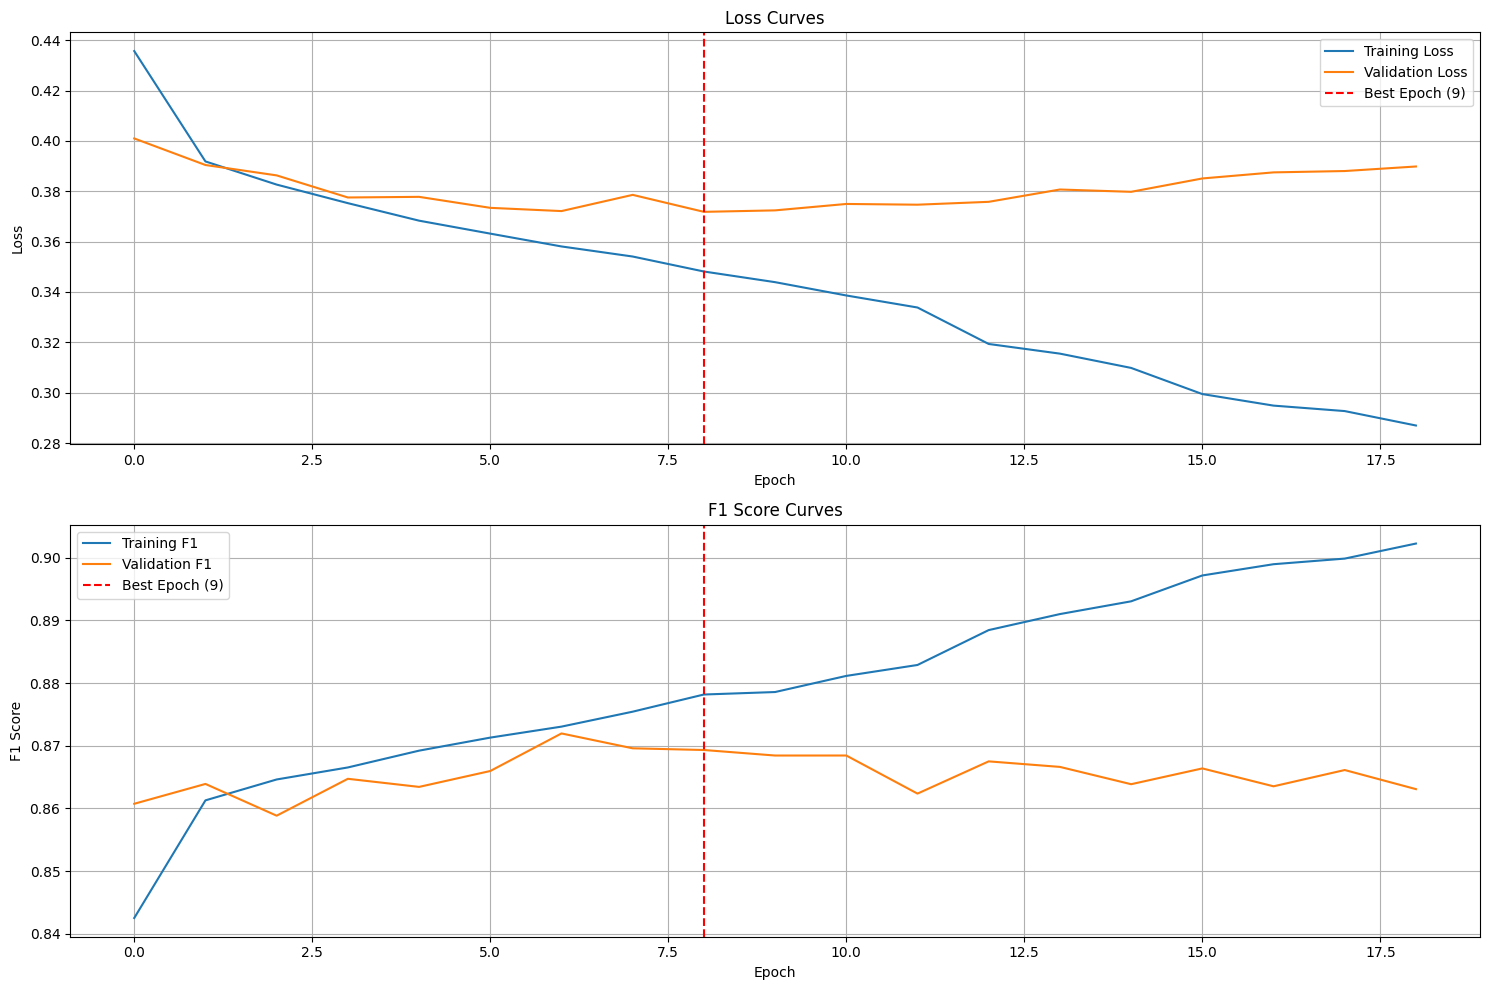


[RESULTS] Best validation loss: 0.3718, F1: 0.8693 at epoch 9

[METRICS] At best epoch 9:
  - Training Loss: 0.3481
  - Validation Loss: 0.3718
  - Training F1: 0.8782
  - Validation F1: 0.8693


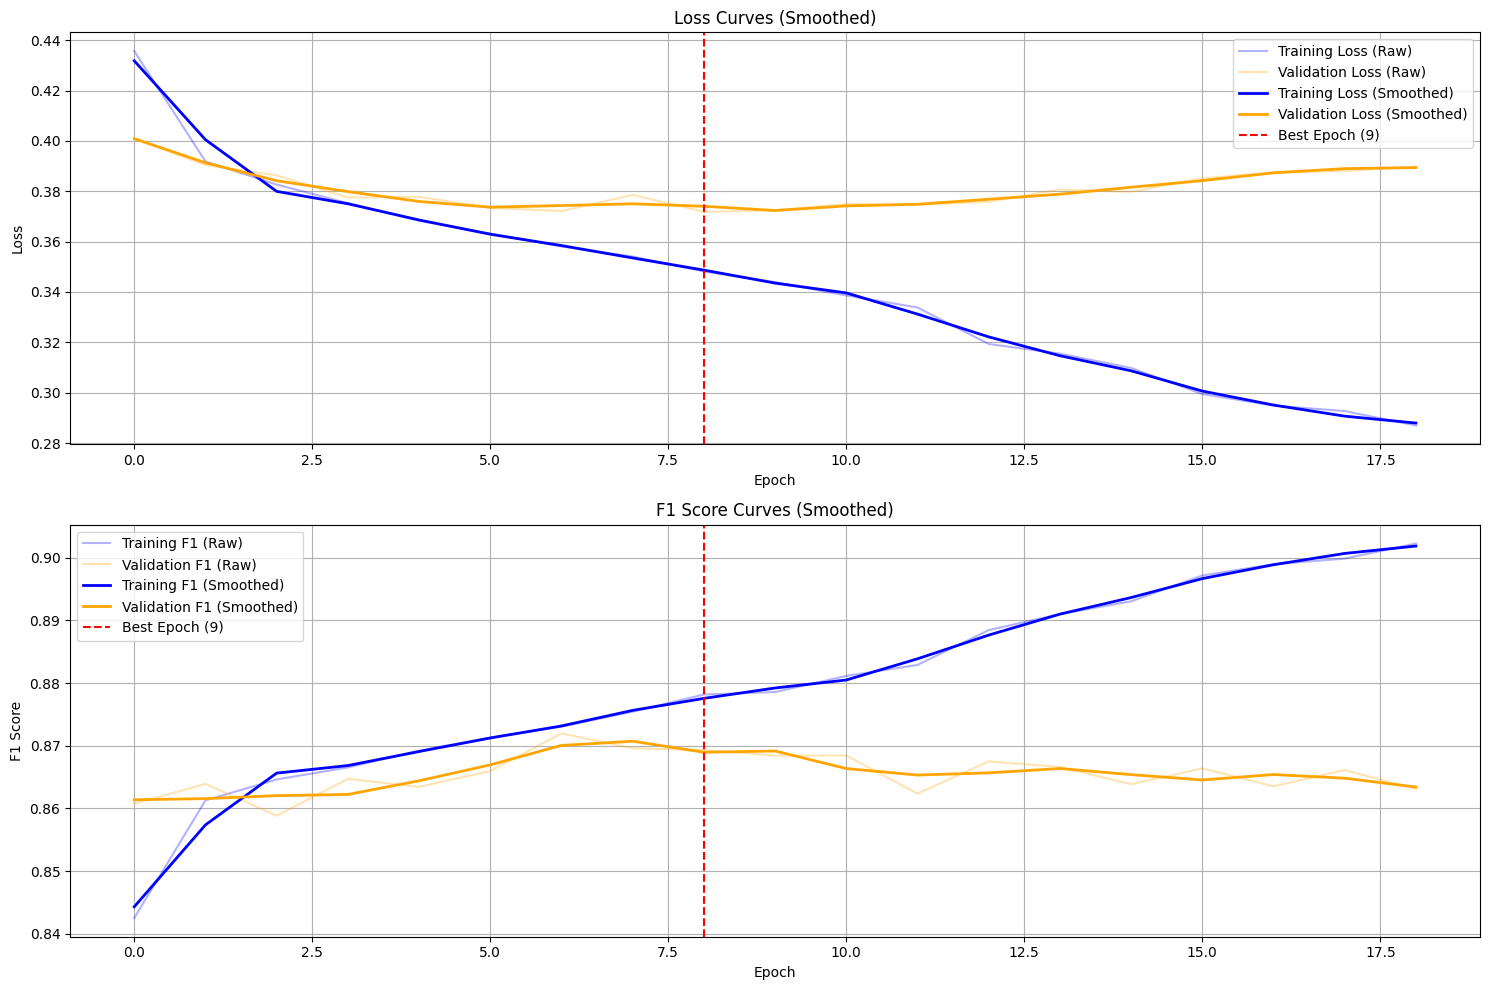


[CONCLUSION] Based on the validation F1 score curves, the optimal number of epochs
             for training the final model is: 9


In [ ]:
# Set global seed for reproducibility
def seed_everything(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

# Set the seed and device
seed_everything(42)
epochs = 100
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("[INFO] Device:", device)

# Load CSVs
train_val_df = pd.read_csv('/content/drive/MyDrive/Thesis/Final/pretrained_train_val_with_structured_final.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Thesis/Final/pretrained_test_with_structured_final.csv')

# Column definition
numeric_cols = ['goal_usd', 'preparation_days', 'creator_backing_count', 'duration', 'blurb_word_count', 'name_word_count']
categorical_cols = ['country_displayable_name', 'parent_category', 'gender', 'quarter']
bool_cols = ['prelaunch_activated', 'staff_pick', 'has_video']

# log-transform
for col in ['goal_usd', 'preparation_days', 'creator_backing_count']:
    train_val_df[f'log_{col}'] = np.log1p(train_val_df[col])
    test_df[f'log_{col}'] = np.log1p(test_df[col])

numeric_cols = ['log_goal_usd', 'log_preparation_days', 'log_creator_backing_count', 'duration', 'blurb_word_count', 'name_word_count']

# ColumnTransformer definition
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('bool', 'passthrough', bool_cols)
])

# Data convertion
structured_cols = numeric_cols + categorical_cols + bool_cols

X_train_val_structured = preprocessor.fit_transform(train_val_df[structured_cols]).toarray()
X_test_structured = preprocessor.transform(test_df[structured_cols]).toarray()

# Extract text embedding
X_train_val_embed = train_val_df.iloc[:, 0:768].values
X_test_embed = test_df.iloc[:, 0:768].values

# Concetanate
X_train_val_final = np.hstack([X_train_val_embed, X_train_val_structured])
X_test_final = np.hstack([X_test_embed, X_test_structured])

# Tensor convert
X_train_val_tensor = torch.tensor(X_train_val_final, dtype=torch.float32)
y_train_val_tensor = torch.tensor(train_val_df['state_binary'].values.reshape(-1, 1), dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_final, dtype=torch.float32)
y_test_tensor = torch.tensor(test_df['state_binary'].values.reshape(-1, 1), dtype=torch.float32)

print(f"[INFO] Final Train/Val Shape: {X_train_val_tensor.shape}")
print(f"[INFO] Final Test Shape: {X_test_tensor.shape}")

input_size = X_train_val_tensor.shape[1]

# Model definition
def build_model(input_size, trial):
    n_layers = trial.suggest_int("n_layers", 2, 5)
    base_hidden_size = trial.suggest_categorical("hidden_size", [256, 384, 512])
    activation = trial.suggest_categorical("activation", ["ReLU", "LeakyReLU"])
    dropout = trial.suggest_float("dropout", 0.1, 0.4)

    layers = []
    in_features = input_size
    for i in range(n_layers):
        hidden_size = max(int(base_hidden_size // (1.5 ** i)), 64)
        layers.append(nn.Linear(in_features, hidden_size))

        if activation == "LeakyReLU":
            layers.append(nn.LeakyReLU(0.1))
        else:
            layers.append(getattr(nn, activation)())

        layers.append(nn.Dropout(dropout))
        in_features = hidden_size

    layers.append(nn.Linear(in_features, 1))
    return nn.Sequential(*layers).to(device)

# Training function
loader_kwargs = dict(num_workers=4, pin_memory=True)


def train_model(model, train_loader, val_loader, optimizer, criterion, epochs, patience=10, trial=None, fold_offset=0, delta=1e-4):
    best_val_loss = float('inf')
    patience_counter = 0
    best_model_state = None
    best_f1 = 0.0

    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode='min', factor=0.5, patience=2
    )

    for epoch in range(epochs):
        model.train()
        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            optimizer.zero_grad()
            preds = model(xb)
            loss = criterion(preds, yb)
            loss.backward()
            optimizer.step()

        model.eval()
        val_losses, all_preds, all_labels = [], [], []
        with torch.no_grad():
            for xb, yb in val_loader:
                xb, yb = xb.to(device), yb.to(device)
                preds = model(xb)
                val_losses.append(criterion(preds, yb).item())
                all_preds.append(torch.sigmoid(preds).cpu())
                all_labels.append(yb.cpu())

        avg_val_loss = np.mean(val_losses)
        preds_bin = (torch.cat(all_preds).numpy() > 0.5).astype(int)
        labels_cat = torch.cat(all_labels).numpy()
        val_f1 = f1_score(labels_cat, preds_bin)

        scheduler.step(avg_val_loss)

        if trial:
            trial.report(val_f1, step=fold_offset + epoch)
            if trial.should_prune():
                raise optuna.exceptions.TrialPruned()

        # Early stopping based on validation loss with delta=1e-4
        if avg_val_loss < best_val_loss - delta:  # Only consider improvement > delta
            best_val_loss = avg_val_loss
            best_f1 = val_f1
            best_model_state = copy.deepcopy(model.state_dict())
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                break

    if best_model_state:
        model.load_state_dict(best_model_state)

    return model, best_f1


# STEP 2: NESTED CV
outer_folds = 5
outer_cv = StratifiedKFold(n_splits=outer_folds, shuffle=True, random_state=42)
outer_results = []

print("\n" + "="*80)
print(" STARTING NESTED CROSS-VALIDATION")
print("="*80)

for outer_fold, (train_idx, val_idx) in enumerate(outer_cv.split(X_train_val_tensor.numpy(), y_train_val_tensor.numpy())):
    print(f"\n[FOLD {outer_fold + 1}/{outer_folds}] Starting outer fold...")
    # fold별로 새로운 preprocessor 생성
    fold_preprocessor = ColumnTransformer([
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('bool', 'passthrough', bool_cols)
    ])

    # train 데이터만으로 fit
    X_train_structured = fold_preprocessor.fit_transform(train_val_df.iloc[train_idx][structured_cols]).toarray()
    X_val_structured = fold_preprocessor.transform(train_val_df.iloc[val_idx][structured_cols]).toarray()

    # 임베딩과 결합
    X_train_final = np.hstack([X_train_val_embed[train_idx], X_train_structured])
    X_val_final = np.hstack([X_train_val_embed[val_idx], X_val_structured])

    X_train_outer = torch.tensor(X_train_final, dtype=torch.float32)
    y_train_outer = torch.tensor(train_val_df.iloc[train_idx]['state_binary'].values.reshape(-1, 1), dtype=torch.float32)
    X_val_outer = torch.tensor(X_val_final, dtype=torch.float32)
    y_val_outer = torch.tensor(train_val_df.iloc[val_idx]['state_binary'].values.reshape(-1, 1), dtype=torch.float32)

    def objective(trial):
        print(f"Starting Trial #{trial.number+1}/50")
        model = build_model(X_train_outer.shape[1], trial)

        optimizer_name  = trial.suggest_categorical("optimizer", ["Adam", "AdamW"])
        lr              = trial.suggest_float("lr", 1e-5, 1e-3, log=True)
        weight_decay    = trial.suggest_float("weight_decay", 1e-6, 1e-3, log=True)
        batch_size      = trial.suggest_categorical("batch_size", [128, 256, 512])



        patience_param = 10
        criterion = nn.BCEWithLogitsLoss()

        skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
        f1_scores = []

        for fold_idx, (tr_idx, va_idx) in enumerate(skf.split(X_train_outer.numpy(), y_train_outer.numpy())):
            X_tr, y_tr = X_train_outer[tr_idx], y_train_outer[tr_idx]
            X_va, y_va = X_train_outer[va_idx], y_train_outer[va_idx]

            train_loader = DataLoader(
                TensorDataset(X_tr, y_tr),
                batch_size=batch_size,
                shuffle=True,
                **loader_kwargs
            )
            val_loader = DataLoader(
                TensorDataset(X_va, y_va),
                batch_size=batch_size,
                shuffle=False,
                **loader_kwargs
            )

            model_copy = copy.deepcopy(model)
            optimizer = getattr(optim, optimizer_name)(
                model_copy.parameters(), lr=lr, weight_decay=weight_decay
            )

            # Suppress output during inner CV by passing trial
            trained_model, _ = train_model(
                model_copy, train_loader, val_loader,
                optimizer, criterion, epochs, patience_param,
                trial, fold_idx * epochs
            )

            trained_model.eval()
            with torch.no_grad():
                xb, yb = X_va.to(device), y_va.to(device)
                preds = torch.sigmoid(trained_model(xb)).cpu().numpy()
                preds_bin = (preds > 0.5).astype(int)
                f1_score_fold = f1_score(yb.cpu().numpy(), preds_bin)
                f1_scores.append(f1_score_fold)

        return np.mean(f1_scores)

    print(f"[FOLD {outer_fold + 1}/{outer_folds}] Starting hyperparameter search with Optuna...")

    # Configure Optuna logging to be more concise
    optuna.logging.set_verbosity(optuna.logging.INFO)
    sampler = optuna.samplers.TPESampler(seed=42)
    study = optuna.create_study(
        direction="maximize",
        pruner=optuna.pruners.MedianPruner(n_startup_trials=5, n_warmup_steps=5)
    )
    study.optimize(objective, n_trials=30)

    best_params = study.best_trial.params
    print(f"\n[FOLD {outer_fold + 1}/{outer_folds}] Best hyperparameters:")
    for param_name, param_value in best_params.items():
        print(f"  - {param_name}: {param_value}")

    # Evaluate on outer validation
    print(f"\n[FOLD {outer_fold + 1}/{outer_folds}] Training model with best hyperparameters...")
    final_model = build_model(X_train_outer.shape[1], optuna.trial.FixedTrial(best_params))
    optimizer  = getattr(optim, best_params['optimizer'])(
        final_model.parameters(),
        lr=best_params['lr'],
        weight_decay=best_params['weight_decay']
    )



    criterion = nn.BCEWithLogitsLoss()

    train_loader = DataLoader(
        TensorDataset(X_train_outer, y_train_outer),
        batch_size=best_params['batch_size'], shuffle=True,
        **loader_kwargs
    )
    val_loader = DataLoader(
        TensorDataset(X_val_outer, y_val_outer),
        batch_size=best_params['batch_size'],
        shuffle=False,
        **loader_kwargs
    )

    final_model, _ = train_model(
        final_model, train_loader, val_loader,
        optimizer, criterion, epochs, patience=10, delta=1e-4
    )

    final_model.eval()
    with torch.no_grad():
        xb, yb = X_val_outer.to(device), y_val_outer.to(device)
        preds = torch.sigmoid(final_model(xb)).cpu().numpy()
        preds_bin = (preds > 0.5).astype(int)
        f1 = f1_score(yb.cpu().numpy(), preds_bin)
        auc = roc_auc_score(yb.cpu().numpy(), preds)
        print(f"\n[FOLD {outer_fold+1}/{outer_folds}] Results: F1={f1:.4f}, AUC={auc:.4f}")

    outer_results.append({
        "fold": outer_fold + 1,
        "f1": f1,
        "auc": auc,
        "params": best_params
    })

print("\n" + "="*80)
print(" NESTED CV COMPLETED")
print("="*80)

# Calculate mean performance across outer folds
mean_f1 = np.mean([r["f1"] for r in outer_results])
mean_auc = np.mean([r["auc"] for r in outer_results])
std_f1 = np.std([r["f1"] for r in outer_results])
std_auc = np.std([r["auc"] for r in outer_results])

print(f"\n[RESULTS] Nested CV Results: ")
print(f"  - Avg F1={mean_f1:.4f} (±{std_f1:.4f})")
print(f"  - Avg AUC={mean_auc:.4f} (±{std_auc:.4f})")

# Print detailed results for each fold
print("\n[DETAILED FOLD RESULTS]")
for res in outer_results:
    print(f"  Fold {res['fold']}: F1={res['f1']:.4f}, AUC={res['auc']:.4f}")

# STEP 3: DETERMINE BEST HYPERPARAMETERS FROM BEST FOLD
print("\n" + "="*80)
print(" DETERMINING BEST HYPERPARAMETERS FROM TOP-PERFORMING FOLD")
print("="*80)

# Find the best-performing fold based on F1 score
best_fold_idx = np.argmax([r["f1"] for r in outer_results])
best_fold_params = outer_results[best_fold_idx]["params"]
best_fold_f1 = outer_results[best_fold_idx]["f1"]
best_fold_auc = outer_results[best_fold_idx]["auc"]

# Use the parameters from the best fold
final_params = best_fold_params.copy()

print(f"\n[BEST FOLD] Fold {best_fold_idx + 1} with F1={best_fold_f1:.4f}, AUC={best_fold_auc:.4f}")
print("\n[FINAL HYPERPARAMETERS]")
for key, value in final_params.items():
    if isinstance(value, float):
        print(f"  - {key}: {value:.6f}")
    else:
        print(f"  - {key}: {value}")

# STEP 3: FINAL TRAIN+VAL EVALUATION WITH METRIC TRACKING
print("\n" + "="*80)
print(" TRAINING FINAL MODEL WITH VALIDATION METRICS TRACKING")
print("="*80)

# Create fixed trial with the best parameters
fixed_trial = optuna.trial.FixedTrial(final_params)

# Initialize the final model
final_model = build_model(X_train_val_tensor.shape[1], fixed_trial)
optimizer = getattr(optim, final_params['optimizer'])(
    final_model.parameters(),
    lr=final_params['lr'],
    weight_decay=final_params['weight_decay']
)
criterion = nn.BCEWithLogitsLoss()

# Split train_val data into train and validation sets
X_train_final, X_val_final, y_train_final, y_val_final = train_test_split(
    X_train_val_tensor.numpy(), y_train_val_tensor.numpy(),
    test_size=0.1, stratify=y_train_val_tensor.numpy(), random_state=42
)

# Convert back to tensors
X_train_final = torch.tensor(X_train_final, dtype=torch.float32)
y_train_final = torch.tensor(y_train_final, dtype=torch.float32)
X_val_final = torch.tensor(X_val_final, dtype=torch.float32)
y_val_final = torch.tensor(y_val_final, dtype=torch.float32)

# Create data loaders
train_loader = DataLoader(
    TensorDataset(X_train_final, y_train_final),
    batch_size=final_params['batch_size'],
    shuffle=True,
    **loader_kwargs
)

val_loader = DataLoader(
    TensorDataset(X_val_final, y_val_final),
    batch_size=final_params['batch_size'],
    shuffle=False,
    **loader_kwargs
)


# Metrics tracking function with validation loss as early stopping criterion
def train_with_metrics(model, train_loader, val_loader, optimizer, criterion, epochs, patience=10, delta=1e-4):
    best_val_loss = float('inf')
    best_epoch = 0
    wait = 0
    best_state = copy.deepcopy(model.state_dict())

    # Lists to store metrics
    train_losses = []
    val_losses = []
    train_f1s = []
    val_f1s = []

    # Learning Rate Scheduler
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode='min', factor=0.5, patience=2
    )

    for epoch in range(epochs):
        # Training phase
        model.train()
        train_loss = 0.0
        train_preds = []
        train_labels = []

        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            optimizer.zero_grad()
            outputs = final_model(xb)
            loss = criterion(outputs, yb)
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * len(xb)
            train_preds.append(torch.sigmoid(outputs).detach().cpu())
            train_labels.append(yb.detach().cpu())

        # Calculate training metrics
        train_loss /= len(train_loader.dataset)
        train_preds_cat = torch.cat(train_preds).numpy()
        train_labels_cat = torch.cat(train_labels).numpy()
        train_f1 = f1_score(train_labels_cat, (train_preds_cat > 0.5).astype(int))

        # Validation phase
        model.eval()
        val_loss = 0.0
        val_preds = []
        val_labels = []

        with torch.no_grad():
            for xb, yb in val_loader:
                xb, yb = xb.to(device), yb.to(device)
                outputs = final_model(xb)
                loss = criterion(outputs, yb)
                val_loss += loss.item() * len(xb)

                val_preds.append(torch.sigmoid(outputs).cpu())
                val_labels.append(yb.cpu())

        # Calculate validation metrics
        val_loss /= len(val_loader.dataset)
        val_preds_cat = torch.cat(val_preds).numpy()
        val_labels_cat = torch.cat(val_labels).numpy()
        val_f1 = f1_score(val_labels_cat, (val_preds_cat > 0.5).astype(int))

        scheduler.step(val_loss)

        # Store metrics
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_f1s.append(train_f1)
        val_f1s.append(val_f1)

        # Print progress
        print(f"Epoch {epoch+1}/{epochs} - Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, "
              f"Train F1: {train_f1:.4f}, Val F1: {val_f1:.4f}")

        # Early stopping check (based on validation loss with delta=1e-4)
        if val_loss < best_val_loss - delta:  # Only save if improvement is greater than delta
            best_val_loss = val_loss
            best_epoch = epoch
            best_state = copy.deepcopy(model.state_dict())
            wait = 0
        else:
            wait += 1
            if wait >= patience:
                print(f"Early stopping triggered! No significant improvement for {patience} epochs.")
                print(f"Best epoch was {best_epoch+1} with validation loss: {best_val_loss:.6f}")
                break

    # Restore best model
    model.load_state_dict(best_state)

    # Plot training curves
    plt.figure(figsize=(15, 10))

    # Loss curves
    plt.subplot(2, 1, 1)
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.axvline(x=best_epoch, color='r', linestyle='--',
                label=f'Best Epoch ({best_epoch+1})')
    plt.title('Loss Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # F1 score curves
    plt.subplot(2, 1, 2)
    plt.plot(train_f1s, label='Training F1')
    plt.plot(val_f1s, label='Validation F1')
    plt.axvline(x=best_epoch, color='r', linestyle='--',
                label=f'Best Epoch ({best_epoch+1})')
    plt.title('F1 Score Curves')
    plt.xlabel('Epoch')
    plt.ylabel('F1 Score')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    # Return model and metrics
    return model, {
        'best_epoch': best_epoch,
        'best_val_loss': best_val_loss,
        'train_losses': train_losses,
        'val_losses': val_losses,
        'train_f1s': train_f1s,
        'val_f1s': val_f1s
    }

# Train with metrics tracking
print("\n[TRACKING] Training final model with metrics tracking...")
final_model, metrics = train_with_metrics(
    final_model, train_loader, val_loader,
    optimizer, criterion, epochs=epochs, patience=10, delta=1e-4
)

# Print results
print(f"\n[RESULTS] Best validation loss: {metrics['best_val_loss']:.4f}, F1: {metrics['val_f1s'][metrics['best_epoch']]:.4f} at epoch {metrics['best_epoch']+1}")

# Calculate and display metrics at best epoch
best_epoch = metrics['best_epoch']
print(f"\n[METRICS] At best epoch {best_epoch+1}:")
print(f"  - Training Loss: {metrics['train_losses'][best_epoch]:.4f}")
print(f"  - Validation Loss: {metrics['val_losses'][best_epoch]:.4f}")
print(f"  - Training F1: {metrics['train_f1s'][best_epoch]:.4f}")
print(f"  - Validation F1: {metrics['val_f1s'][best_epoch]:.4f}")

# Apply smoothing to the curves
from scipy.signal import savgol_filter

# Function to apply smoothing
def apply_smoothing(data, window_length=5, polyorder=2):
    if len(data) <= window_length:
        return data  # Not enough data points for smoothing

    # Ensure window_length is odd
    if window_length % 2 == 0:
        window_length += 1

    return savgol_filter(data, window_length, polyorder)

# Plot smoothed curves
plt.figure(figsize=(15, 10))

# Loss curves (smoothed)
plt.subplot(2, 1, 1)
train_losses = metrics['train_losses']
val_losses = metrics['val_losses']

if len(train_losses) >= 5:  # Only smooth if we have enough points
    train_losses_smooth = apply_smoothing(train_losses)
    val_losses_smooth = apply_smoothing(val_losses)

    plt.plot(train_losses, 'b-', alpha=0.3, label='Training Loss (Raw)')
    plt.plot(val_losses, 'orange', alpha=0.3, label='Validation Loss (Raw)')
    plt.plot(train_losses_smooth, 'b-', linewidth=2, label='Training Loss (Smoothed)')
    plt.plot(val_losses_smooth, 'orange', linewidth=2, label='Validation Loss (Smoothed)')
else:
    plt.plot(train_losses, 'b-', label='Training Loss')
    plt.plot(val_losses, 'orange', label='Validation Loss')

plt.axvline(x=best_epoch, color='r', linestyle='--', label=f'Best Epoch ({best_epoch+1})')
plt.title('Loss Curves (Smoothed)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# F1 score curves (smoothed)
plt.subplot(2, 1, 2)
train_f1s = metrics['train_f1s']
val_f1s = metrics['val_f1s']

if len(train_f1s) >= 5:  # Only smooth if we have enough points
    train_f1s_smooth = apply_smoothing(train_f1s)
    val_f1s_smooth = apply_smoothing(val_f1s)

    plt.plot(train_f1s, 'b-', alpha=0.3, label='Training F1 (Raw)')
    plt.plot(val_f1s, 'orange', alpha=0.3, label='Validation F1 (Raw)')
    plt.plot(train_f1s_smooth, 'b-', linewidth=2, label='Training F1 (Smoothed)')
    plt.plot(val_f1s_smooth, 'orange', linewidth=2, label='Validation F1 (Smoothed)')
else:
    plt.plot(train_f1s, 'b-', label='Training F1')
    plt.plot(val_f1s, 'orange', label='Validation F1')

plt.axvline(x=best_epoch, color='r', linestyle='--', label=f'Best Epoch ({best_epoch+1})')
plt.title('F1 Score Curves (Smoothed)')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print("\n[CONCLUSION] Based on the validation F1 score curves, the optimal number of epochs")
print(f"             for training the final model is: {best_epoch+1}")


 EVALUATING FINAL MODEL ON TEST SET

[TEST RESULTS]
  - F1 Score: 0.8691
  - Precision: 0.8394
  - Recall: 0.9010
  - AUC: 0.9074


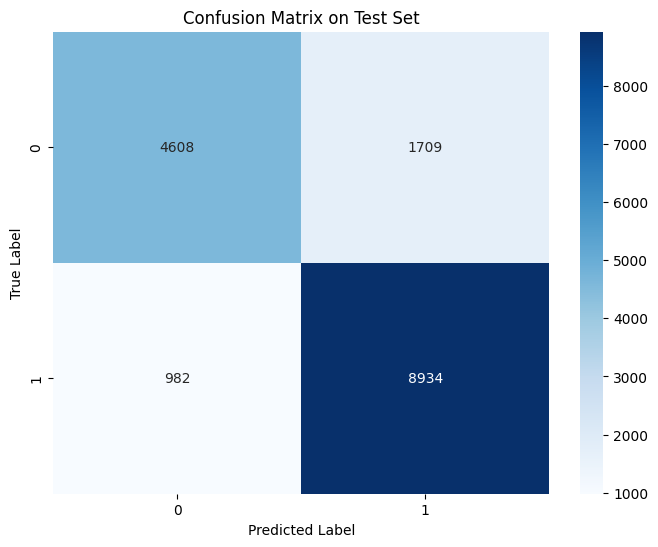

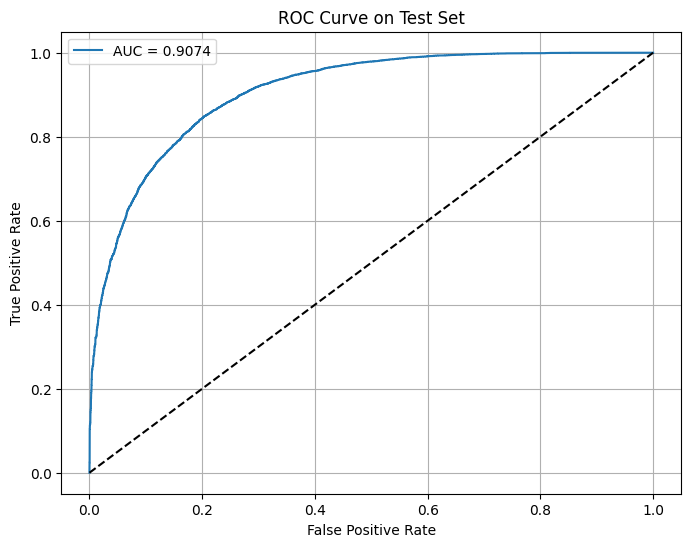

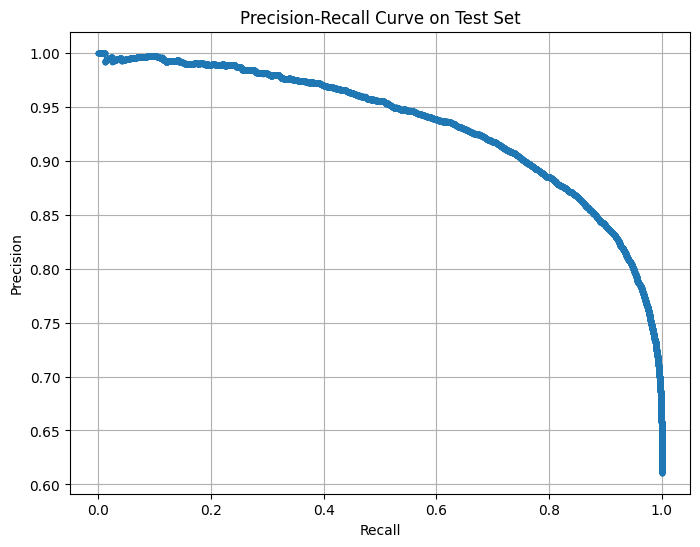


[INFO] Final model saved to /content/drive/MyDrive/Thesis/Final/MLP_structured_text_final_code_result/final_trained_model.pt


In [ ]:
# STEP 4: EVALUATE ON TEST SET
print("\n" + "="*80)
print(" EVALUATING FINAL MODEL ON TEST SET")
print("="*80)

# Create test data loader
test_loader = DataLoader(
    TensorDataset(X_test_tensor, y_test_tensor),
    batch_size=final_params['batch_size'],
    shuffle=False,
    **loader_kwargs
)

# Evaluate on test set
final_model.eval()
test_preds = []
test_labels = []

with torch.no_grad():
    for xb, yb in test_loader:
        xb, yb = xb.to(device), yb.to(device)
        outputs = final_model(xb)

        test_preds.append(torch.sigmoid(outputs).cpu())
        test_labels.append(yb.cpu())

# Calculate and report metrics
test_preds_cat = torch.cat(test_preds).numpy()
test_labels_cat = torch.cat(test_labels).numpy()
test_preds_bin = (test_preds_cat > 0.5).astype(int)

# Calculate metrics
test_f1 = f1_score(test_labels_cat, test_preds_bin)
test_precision = precision_score(test_labels_cat, test_preds_bin)
test_recall = recall_score(test_labels_cat, test_preds_bin)
test_auc = roc_auc_score(test_labels_cat, test_preds_cat)

# Print results
print("\n[TEST RESULTS]")
print(f"  - F1 Score: {test_f1:.4f}")
print(f"  - Precision: {test_precision:.4f}")
print(f"  - Recall: {test_recall:.4f}")
print(f"  - AUC: {test_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(test_labels_cat, test_preds_bin)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix on Test Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(test_labels_cat, test_preds_cat)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {test_auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve on Test Set')
plt.legend()
plt.grid(True)
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(test_labels_cat, test_preds_cat)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve on Test Set')
plt.grid(True)
plt.show()

# Save model
model_path = "/content/drive/MyDrive/Thesis/Final/MLP_structured_text_final_code_result/final_trained_model.pt"
torch.save({
    'model_state_dict': final_model.state_dict(),
    'hyperparameters': final_params,
    'metrics': {
        'train_f1': metrics['train_f1s'][metrics['best_epoch']],
        'val_f1': metrics['val_f1s'][metrics['best_epoch']],
        'test_f1': test_f1,
        'test_precision': test_precision,
        'test_recall': test_recall,
        'test_auc': test_auc
    }
}, model_path)

print(f"\n[INFO] Final model saved to {model_path}")

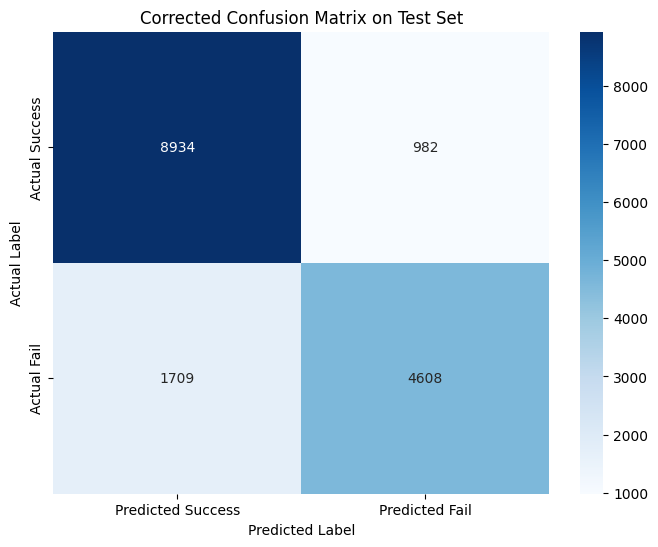

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 저장된 predictions CSV 파일 경로
csv_path = "/content/drive/MyDrive/Thesis/Final/MLP_structured_text_final_code_result/test_predictions.csv"

# 데이터 불러오기
test_predictions_df = pd.read_csv(csv_path)

# 혼동 행렬 생성 (성공=1을 먼저 배치하도록 변경)
cm = confusion_matrix(test_predictions_df['actual_labels'],
                      test_predictions_df['predicted_labels'],
                      labels=[1, 0])

# 혼동 행렬 다시 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Success', 'Predicted Fail'],
            yticklabels=['Actual Success', 'Actual Fail'])

plt.title('Corrected Confusion Matrix on Test Set')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

# 수정된 confusion matrix 다시 저장하기
save_dir = "/content/drive/MyDrive/Thesis/Final/MLP_structured_text_final_code_result"
plt.savefig(f"{save_dir}/test_confusion_matrix_corrected.png")

plt.show()


In [ ]:
# Python Code to Save All Relevant Files for Future Reference
import os
import pandas as pd
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve

# Directory for saving
save_dir = "/content/drive/MyDrive/Thesis/Final/MLP_structured_text_final_code_result"
os.makedirs(save_dir, exist_ok=True)

# Save country performance analysis CSV
country_results_df.to_csv(os.path.join(save_dir, "country_performance_analysis.csv"), index=False)

# Save test set predictions and labels
test_predictions_df = pd.DataFrame({
    'actual_labels': test_labels_cat.flatten(),
    'predicted_labels': test_preds_bin.flatten(),
    'predicted_probabilities': test_preds_cat.flatten()
})
test_predictions_df.to_csv(os.path.join(save_dir, "test_predictions.csv"), index=False)

# Save final model with state_dict, hyperparameters, and metrics
model_path = os.path.join(save_dir, "final_trained_model.pt")
torch.save({
    'model_state_dict': final_model.state_dict(),
    'hyperparameters': final_params,
    'metrics': {
        'train_f1': metrics['train_f1s'][metrics['best_epoch']],
        'val_f1': metrics['val_f1s'][metrics['best_epoch']],
        'test_f1': test_f1,
        'test_precision': test_precision,
        'test_recall': test_recall,
        'test_auc': test_auc
    }
}, model_path)

# Save confusion matrix plot
cm = confusion_matrix(test_labels_cat, test_preds_bin)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix on Test Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig(os.path.join(save_dir, "test_confusion_matrix.png"))
plt.close()

# Save ROC curve plot
fpr, tpr, _ = roc_curve(test_labels_cat, test_preds_cat)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {test_auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve on Test Set')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(save_dir, "test_roc_curve.png"))
plt.close()

# Save Precision-Recall curve plot
precision, recall, _ = precision_recall_curve(test_labels_cat, test_preds_cat)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve on Test Set')
plt.grid(True)
plt.savefig(os.path.join(save_dir, "test_precision_recall_curve.png"))
plt.close()

print(f"\n[INFO] All relevant files have been saved to: {save_dir}")



[INFO] All relevant files have been saved to: /content/drive/MyDrive/Thesis/Final/MLP_structured_text_final_code_result


##Global error rate

In [ ]:
# Global metrics calculation
import pandas as pd
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score

test_df = pd.read_csv('/content/drive/MyDrive/Thesis/Final/MLP_structured_text_final_code_result/test_dataset.csv')
predictions_df = pd.read_csv('/content/drive/MyDrive/Thesis/Final/MLP_structured_text_final_code_result/test_predictions.csv')
total_samples = len(predictions_df)
total_errors = (predictions_df['actual_labels'] != predictions_df['predicted_labels']).sum()
global_error_rate = total_errors / total_samples

global_f1 = f1_score(predictions_df['actual_labels'], predictions_df['predicted_labels'])
global_precision = precision_score(predictions_df['actual_labels'], predictions_df['predicted_labels'])
global_recall = recall_score(predictions_df['actual_labels'], predictions_df['predicted_labels'])
global_auc = roc_auc_score(predictions_df['actual_labels'], predictions_df['predicted_probabilities'])

# Display global metrics
print(f"Global Error Rate: {global_error_rate:.4f}")
print(f"Global F1-score: {global_f1:.4f}")
print(f"Global Precision: {global_precision:.4f}")
print(f"Global Recall: {global_recall:.4f}")
print(f"Global AUC-ROC: {global_auc:.4f}")


Global Error Rate: 0.1658
Global F1-score: 0.8691
Global Precision: 0.8394
Global Recall: 0.9010
Global AUC-ROC: 0.9074


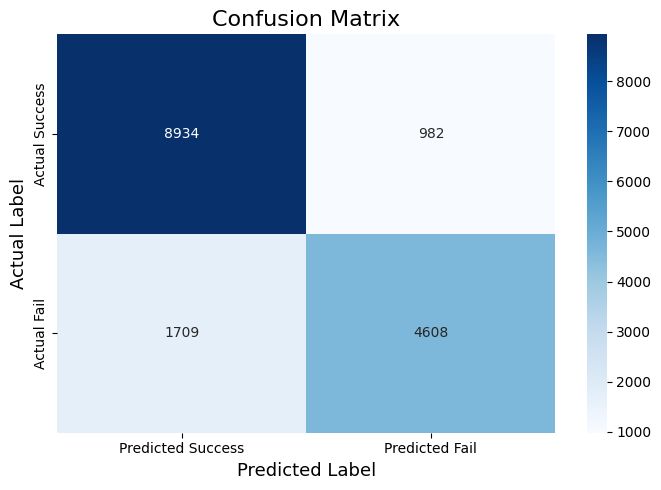

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc


cm = confusion_matrix(predictions_df['actual_labels'], predictions_df['predicted_labels'], labels=[1, 0])

# Plot confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Success', 'Predicted Fail'],
            yticklabels=['Actual Success', 'Actual Fail'])

# Add labels and title
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=13)
plt.ylabel('Actual Label', fontsize=13)

plt.tight_layout()
plt.show()


##error rate by categories

In [ ]:
import pandas as pd
import os


test_df = pd.read_csv('/content/drive/MyDrive/Thesis/Final/pretrained_test_with_structured_final.csv')


save_dir = "/content/drive/MyDrive/Thesis/Final/MLP_structured_text_final_code_result"
os.makedirs(save_dir, exist_ok=True)


test_df.to_csv(os.path.join(save_dir, 'test_dataset.csv'), index=False)

print(f"✅ Test dataset saved at: {save_dir}/test_dataset.csv")


✅ Test dataset saved at: /content/drive/MyDrive/Thesis/Final/MLP_structured_text_final_code_result/test_dataset.csv


In [ ]:
import pandas as pd
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score

test_df = pd.read_csv('/content/drive/MyDrive/Thesis/Final/MLP_structured_text_final_code_result/test_dataset.csv')
predictions_df = pd.read_csv('/content/drive/MyDrive/Thesis/Final/MLP_structured_text_final_code_result/test_predictions.csv')

predictions_df['parent_category'] = test_df['parent_category']

def calculate_metrics(group):
    samples = len(group)
    errors = (group['actual_labels'] != group['predicted_labels']).sum()
    error_rate = errors / samples
    f1 = f1_score(group['actual_labels'], group['predicted_labels'])
    precision = precision_score(group['actual_labels'], group['predicted_labels'])
    recall = recall_score(group['actual_labels'], group['predicted_labels'])
    auc = roc_auc_score(group['actual_labels'], group['predicted_probabilities'])


    success_count = (group['actual_labels'] == 1).sum()
    fail_count = (group['actual_labels'] == 0).sum()
    success_ratio = success_count / samples
    fail_ratio = fail_count / samples

    return pd.Series({
        'Samples': samples,
        'Success_Count': success_count,
        'Fail_Count': fail_count,
        'Success_Ratio': success_ratio,
        'Fail_Ratio': fail_ratio,
        'Error_Rate': error_rate,
        'F1': f1,
        'Precision': precision,
        'Recall': recall,
        'AUC': auc
    })

category_metrics = predictions_df.groupby('parent_category').apply(calculate_metrics).reset_index()
category_metrics.sort_values(by='Error_Rate', ascending=False, inplace=True)

category_metrics.to_csv('/content/drive/MyDrive/Thesis/Final/MLP_structured_text_final_code_result/category_performance_metrics.csv', index=False)

print(category_metrics)


<ipython-input-10-cf8fdef7161a>:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  category_metrics = predictions_df.groupby('parent_category').apply(calculate_metrics).reset_index()


   parent_category  Samples  Success_Count  Fail_Count  Success_Ratio  \
14         Theater    510.0          317.0       193.0       0.621569   
0              Art   1650.0         1058.0       592.0       0.641212   
4           Design    661.0          405.0       256.0       0.612708   
11     Photography    590.0          281.0       309.0       0.476271   
2           Crafts    615.0          240.0       375.0       0.390244   
6     Film & Video   2209.0         1390.0       819.0       0.629244   
5          Fashion    984.0          599.0       385.0       0.608740   
9       Journalism    374.0          122.0       252.0       0.326203   
7             Food   1344.0          500.0       844.0       0.372024   
13      Technology   1597.0          892.0       705.0       0.558547   
12      Publishing   1805.0         1286.0       519.0       0.712465   
10           Music   2274.0         1604.0       670.0       0.705365   
3            Dance    241.0          183.0        5

<ipython-input-11-52210410c08d>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Error_Rate', y='parent_category', data=category_metrics, palette='viridis')


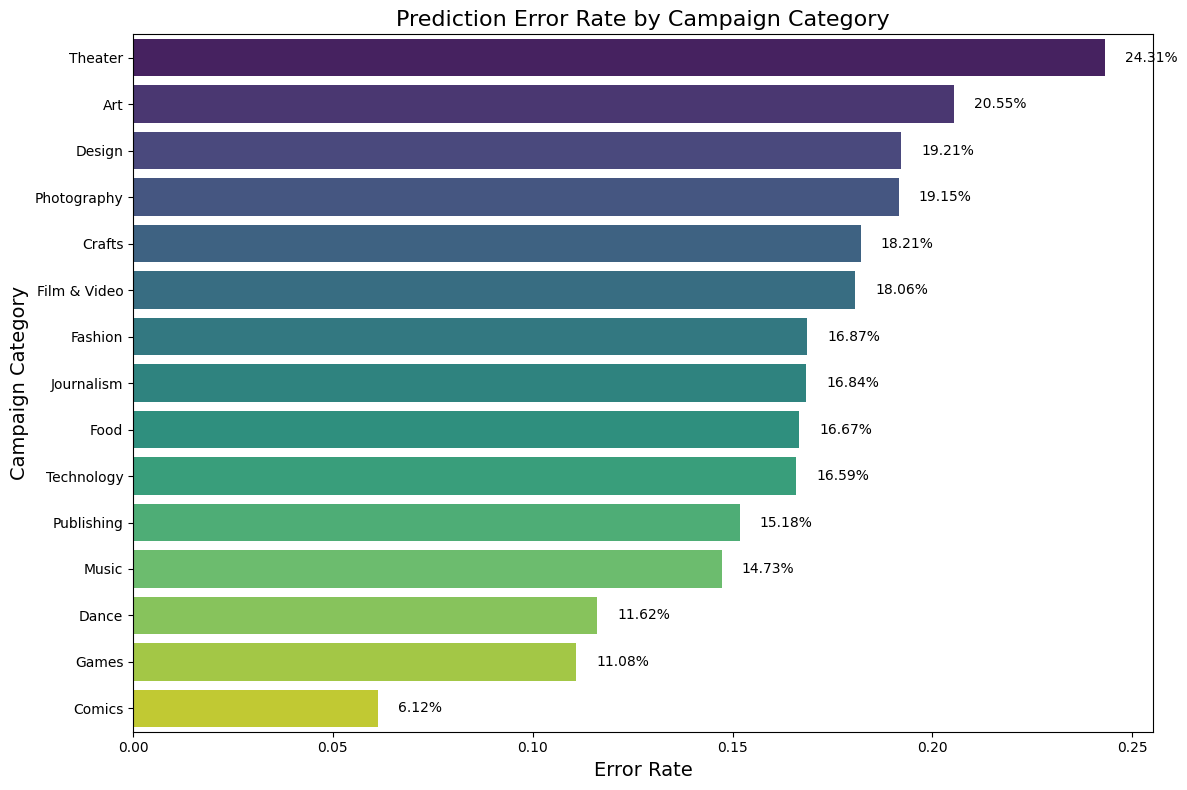

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


category_metrics = pd.read_csv('/content/drive/MyDrive/Thesis/Final/MLP_structured_text_final_code_result/category_performance_metrics.csv')


category_metrics.sort_values(by='Error_Rate', ascending=False, inplace=True)

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Error_Rate', y='parent_category', data=category_metrics, palette='viridis')

# Add plot details
plt.title('Prediction Error Rate by Campaign Category', fontsize=16)
plt.xlabel('Error Rate', fontsize=14)
plt.ylabel('Campaign Category', fontsize=14)


for index, value in enumerate(category_metrics['Error_Rate']):
    plt.text(value + 0.005, index, f'{value:.2%}', va='center')

plt.tight_layout()
plt.show()

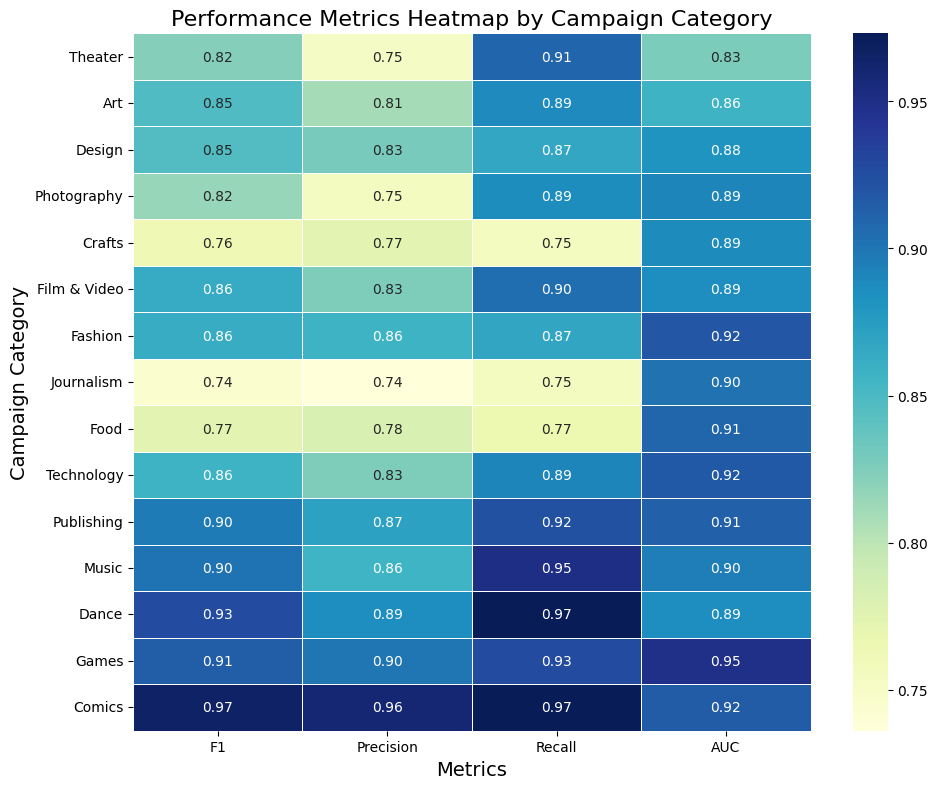

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load metrics data
category_metrics = pd.read_csv('/content/drive/MyDrive/Thesis/Final/MLP_structured_text_final_code_result/category_performance_metrics.csv')

# Prepare data for heatmap
metrics_df = category_metrics.set_index('parent_category')[['F1', 'Precision', 'Recall', 'AUC']]

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(metrics_df, annot=True, fmt=".2f", cmap='YlGnBu', linewidths=.5)

# Enhance readability
plt.title('Performance Metrics Heatmap by Campaign Category', fontsize=16)
plt.xlabel('Metrics', fontsize=14)
plt.ylabel('Campaign Category', fontsize=14)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from scipy.stats import kruskal

# Ensure predictions_df includes 'parent_category', 'actual_labels', and 'predicted_labels'

# Compute precision, recall, F1, and AUC per category
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

def category_metrics(group):
    precision = precision_score(group['actual_labels'], group['predicted_labels'])
    recall = recall_score(group['actual_labels'], group['predicted_labels'])
    f1 = f1_score(group['actual_labels'], group['predicted_labels'])
    auc = roc_auc_score(group['actual_labels'], group['predicted_probabilities'])
    return pd.Series({
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'auc': auc
    })

metrics_df = predictions_df.groupby('parent_category').apply(category_metrics).reset_index()


<ipython-input-8-b9009bb2bd74>:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  metrics_df = predictions_df.groupby('parent_category').apply(category_metrics).reset_index()


In [ ]:
def calculate_detailed_errors(group):
    FP = ((group['actual_labels'] == 0) & (group['predicted_labels'] == 1)).sum()
    FN = ((group['actual_labels'] == 1) & (group['predicted_labels'] == 0)).sum()
    TP = ((group['actual_labels'] == 1) & (group['predicted_labels'] == 1)).sum()
    TN = ((group['actual_labels'] == 0) & (group['predicted_labels'] == 0)).sum()
    samples = len(group)

    return pd.Series({
        'FP': FP,
        'FN': FN,
        'TP': TP,
        'TN': TN,
        'FP_ratio': FP / samples,
        'FN_ratio': FN / samples
    })

error_details = predictions_df.groupby('parent_category').apply(calculate_detailed_errors).reset_index()
print(error_details.sort_values('FP_ratio', ascending=False))


   parent_category     FP     FN      TP     TN  FP_ratio  FN_ratio
14         Theater   95.0   29.0   288.0   98.0  0.186275  0.056863
11     Photography   81.0   32.0   249.0  228.0  0.137288  0.054237
0              Art  221.0  118.0   940.0  371.0  0.133939  0.071515
6     Film & Video  266.0  133.0  1257.0  553.0  0.120416  0.060208
10           Music  256.0   79.0  1525.0  414.0  0.112577  0.034741
4           Design   73.0   54.0   351.0  183.0  0.110439  0.081694
13      Technology  168.0   97.0   795.0  537.0  0.105197  0.060739
12      Publishing  174.0  100.0  1186.0  345.0  0.096399  0.055402
3            Dance   23.0    5.0   178.0   35.0  0.095436  0.020747
5          Fashion   87.0   79.0   520.0  298.0  0.088415  0.080285
9       Journalism   33.0   30.0    92.0  219.0  0.088235  0.080214
2           Crafts   53.0   59.0   181.0  322.0  0.086179  0.095935
7             Food  107.0  117.0   383.0  737.0  0.079613  0.087054
8            Games   49.0   35.0   445.0  229.0 

<ipython-input-2-0220ce062b28>:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  error_details = predictions_df.groupby('parent_category').apply(calculate_detailed_errors).reset_index()


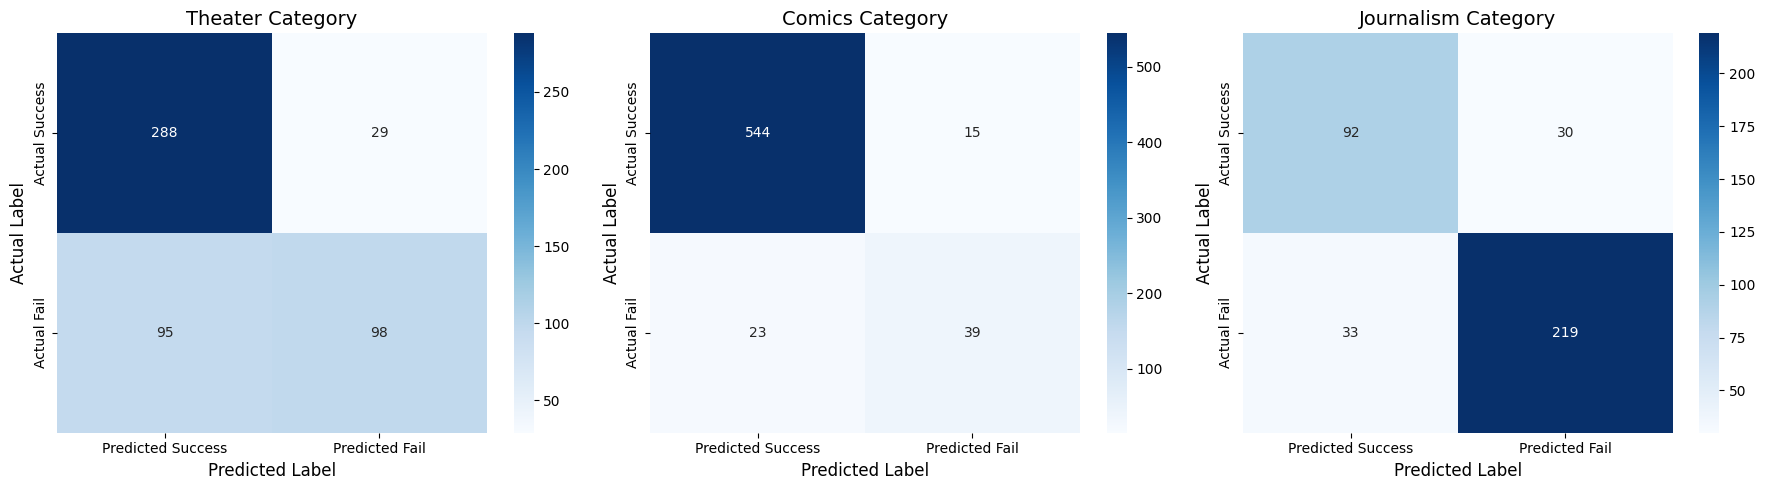

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix


categories = ['Theater', 'Comics', 'Journalism']


fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, category in enumerate(categories):

    category_data = predictions_df[predictions_df['parent_category'] == category]


    cm = confusion_matrix(category_data['actual_labels'], category_data['predicted_labels'], labels=[1, 0])


    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i],
                xticklabels=['Predicted Success', 'Predicted Fail'],
                yticklabels=['Actual Success', 'Actual Fail'])


    axes[i].set_title(f'{category} Category', fontsize=14)
    axes[i].set_xlabel('Predicted Label', fontsize=12)
    axes[i].set_ylabel('Actual Label', fontsize=12)

plt.tight_layout()
plt.show()


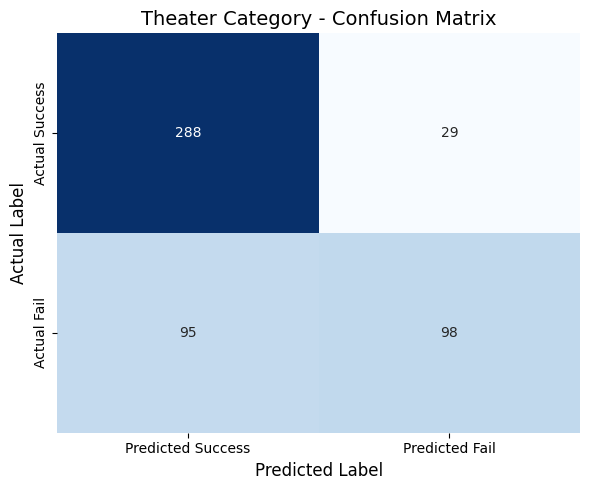

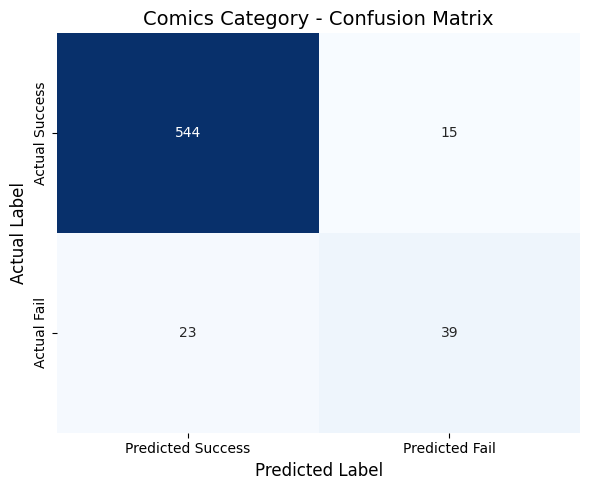

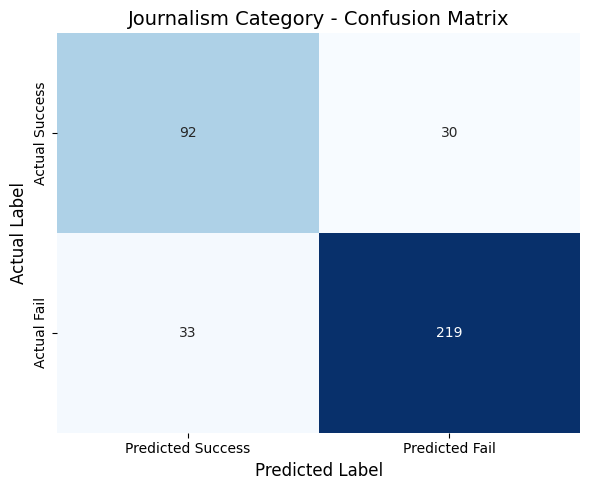

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix

categories = ['Theater', 'Comics', 'Journalism']

for category in categories:
    category_data = predictions_df[predictions_df['parent_category'] == category]

    # 혼동행렬 계산 (TP, FN / FP, TN 표준형태)
    cm = confusion_matrix(category_data['actual_labels'], category_data['predicted_labels'], labels=[1, 0])

    # 개별 figure 생성
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted Success', 'Predicted Fail'],
                yticklabels=['Actual Success', 'Actual Fail'],
                cbar=False)

    plt.title(f'{category} Category - Confusion Matrix', fontsize=14)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('Actual Label', fontsize=12)

    plt.tight_layout()

    # 각 카테고리 혼동 행렬을 개별 이미지로 저장
    plt.savefig(f'confusion_matrix_{category.lower()}_predictions.png', dpi=300)

plt.show()
